<a href="https://colab.research.google.com/github/sshivaditya2019/EEG-Classifier/blob/main/EEG_EMO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **EEG Classification Based on Emotion Using Convlutional Neural Networks**






The Aim of the project is to classify the dataset or EMOTION dataet into 15 classes. Based on time series data and similar correlation in EEG data. Classification of EEG datset is important becuse even in todays time visulization of EEG signals is difficult and a lot of manual processing is reuired for processing it.For example in measuring the dataset for this experiment EMG Signals have to be eliminated from te recording devices.Also It is beleived that EEG is largely random but there is evidenece supporting the claim that part of the EEG data is not random and there is pattern among EEG data found elesewhere.For the intial part of the experiment Transfer Learning is used and the weights of the last few layers is changed leaving the remaining layers untouched.Libraries such MNEiO is used for visulization and analysis of the dataset.The events from the JSON file attached in the datsset is added as events using the inbuilt dict method of the MNEIO.
Apart from this many libraries such as Pandas,  Numpy and Matplotlib are used frequently.This porject's outcomes would be essential into generalizing the EEG data as a whole.







In [ ]:
import os
os.chdir('/content/drive/My Drive/eee_eeg_proj/ds002887-download')
s = os.getcwd()
!pip install mne
!pip install neurodsp
!pip install essentia
!pip install lasagne
!pip install theano
!pip install dask


In [ ]:

import numpy as np
#import pyeeg as pe
import pickle as pickle
import pandas as pd
import math

from sklearn import svm
from sklearn.preprocessing import normalize
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from numpy import save
import os
#import tensorflow as tf
import time
import mne
from mne import io

import theano



from functools import reduce
import math as m

import scipy.io

#import theano.tensor as T

from scipy.interpolate import griddata
from sklearn.preprocessing import scale
from mne.viz import plot_topomap

# Import some NeuroDSP functions to use with MNE
from neurodsp.spectral import compute_spectrum, trim_spectrum
from neurodsp.burst import detect_bursts_dual_threshold
from neurodsp.rhythm import compute_lagged_coherence

# Import NeuroDSP plotting functions
from neurodsp.plts import (plot_time_series, plot_power_spectra,
                           plot_bursts, plot_lagged_coherence)

from matplotlib import cm, colors

# Import time-frequency functions
from neurodsp.timefrequency import amp_by_time, freq_by_time, phase_by_time

# Import utilities for loading and plotting data
from neurodsp.utils import create_times
from neurodsp.utils.download import load_ndsp_data
from neurodsp.plts.time_series import plot_time_series, plot_instantaneous_measure



import re
import pandas as pd

# from mlutils import dataset, connector
import scipy.stats
from scipy.stats import *
from sklearn.preprocessing import StandardScaler
import math
import matplotlib.pyplot as plt
import warnings
import statsmodels.api as sm 
import seaborn as sns
import pylab as py 

import os.path as op

import mne
from mne.channels.montage import get_builtin_montages
from mne.datasets import fetch_fsaverage
from mne.viz import set_3d_title, set_3d_view


import matplotlib.pyplot as plt
import torch
import mne
from mne.datasets import sample
from mne.minimum_norm import make_inverse_operator, apply_inverse

# DataSet
THe data is stored in Google drive. The total size of the dataset is 36.5 GB.The dataset was obtained from OpenNeuro.The dataset format is of the type '.set'.It follows the standard EEGLAB protocol and can be visualized.The data was orginnaly stored in Amazon S3 bucket.It was transferred to google drive using aws-cli.The set uses HdEEG.The diffrence from HdEEG and and ordninary EEG is the large number of electrodes.The System uses 10-20 orientaion for arrangmne tof electrodes on the scalp. The start frequency for the electordes is 256Hz and 225 electrodes are attached to the EEG cap and attached to the participant .The participant data is also recorderd.The participant's gender dominant hand and other things are noted during measurement phase.The data is preprocessed for error occured during recording.The data collection part the emotion imagined is classfied into 15 types. They either of the postitive valence or negative valance.When the subject first begins to feel filled with the suggested emotion, they indicate this by pressing the finger pressure sensor.

In [ ]:

import os
import re
lis_name_fil = os.listdir()
fil_pat = [d for d in ["/" + x + "/eeg/" if x[:3] == 'sub' else None for x in lis_name_fil] if d != None]
fil_pat_contents = [os.listdir(os.getcwd() + x) for x in fil_pat]

import glob
ss = os.getcwd()
n = 0

os.chdir(ss)

#MNE IO

MNE IO or MEG+EEG Analysis Tool is extremly crucial in visualizing the data obtined from the EEG sensors. These help visualize the dataset in understanding manner.They support the EEGLAB file format Which makes it easy for data to be trasnmitted from MATLAB to Python without use of Octave Binaries.

In [ ]:
i = 3
info = mne.create_info(ch_names=['stim_c'],sfreq = 256, ch_types='stim')
s = '/sub-{0}/eeg/sub-{1}_task-ImaginedEmotion_eeg.set'.format(i,i)
raw = mne.io.read_raw_eeglab(input_fname = os.getcwd()+s)
raw.load_data()
s_e = '/sub-{0}/eeg/sub-{0}_task-ImaginedEmotion_events.tsv'.format(3)
df_events = pd.read_csv(os.getcwd()+s_e,sep = '\t')
df_events['randNumCol'] = np.random.randint(1, 6, df_events.shape[0])
dd = ['value','randNumCol','onset']
df_events['onset'] = df_events['onset']
df_events = df_events[dd]
df_events.to_csv(os.getcwd() + '/sub-{0}/eeg/sub-{0}_task-ImaginedEmotion_events.csv'.format(3),index = False, header = False)


Reading /content/drive/My Drive/eee_eeg_proj/ds002887-download/sub-3/eeg/sub-3_task-ImaginedEmotion_eeg.fdt
Reading 0 ... 1251327  =      0.000 ...  4887.996 secs...


In [ ]:
print(len(raw.annotations))
print(set(raw.annotations.duration))
print(set(raw.annotations.description))
print(raw.annotations.onset)

94
{0.0}
{'press', 'postbase', 'frustration', 'InstructionsForEnding', 'joy', 'grief', 'happy', 'FeelingItInstructionsButton', 'exit', 'content', 'relax', 'awe', 'love', 'enter', 'excite', 'fear', 'prebase_instruct', 'prebase', 'relief', 'anger', 'press1', 'sad', 'disgust', 'compassion', 'jealousy', 'ImaginationSuggestions', 'postbase_instruct', 'ExitThankYou'}
[2.94921900e+00 1.33984380e+01 1.33468750e+02 2.00472656e+02
 2.64941406e+02 5.50394531e+02 6.81832031e+02 7.10113281e+02
 8.07800781e+02 8.08800781e+02 8.63980469e+02 9.21562500e+02
 9.31218750e+02 1.01597656e+03 1.04024219e+03 1.10667188e+03
 1.16425391e+03 1.17390234e+03 1.25451953e+03 1.29129688e+03
 1.29304688e+03 1.34700000e+03 1.40459766e+03 1.41425000e+03
 1.51190625e+03 1.51314062e+03 1.57274609e+03 1.63032422e+03
 1.63998438e+03 1.77116797e+03 1.77218359e+03 1.77490234e+03
 1.81318750e+03 1.81532031e+03 1.81676953e+03 1.84802734e+03
 1.90604297e+03 1.91569922e+03 2.08063281e+03 2.08311719e+03
 2.09219922e+03 2.11829688

In [ ]:
raw.get_data()

array([[-8.49853230e-06, -1.24455252e-05, -9.56823349e-06, ...,
        -1.00252075e-05, -8.99685478e-06, -5.95217133e-06],
       [-2.58882737e-06, -4.52097750e-06, -1.37745976e-06, ...,
        -4.81040049e-06, -1.47236729e-06,  1.82307363e-06],
       [-4.30164546e-07, -3.05458045e-06,  1.79830298e-07, ...,
        -7.63947582e-06, -7.72855139e-06, -4.22123384e-06],
       ...,
       [-1.03596535e-05, -1.00085993e-05, -7.14451027e-06, ...,
         4.32433319e-06,  1.75649619e-06, -3.77762467e-07],
       [-1.25325518e-05, -1.42087297e-05, -1.22522802e-05, ...,
         3.91658640e-06, -1.23225760e-06, -8.45484924e-06],
       [-6.84450960e-06, -8.60117722e-06, -5.72192478e-06, ...,
         6.26145601e-06,  5.87719297e-06,  4.44035244e-06]])

#Visualization

The dataset is visualized using the native plotting libraries present withtin MNE IO.This helps in easy represenation of the data also helps in understanding the data better.

In [ ]:
raw

<RawEEGLAB | sub-3_task-ImaginedEmotion_eeg.fdt, 134 x 1251328 (4888.0 s), ~1.25 GB, data loaded>

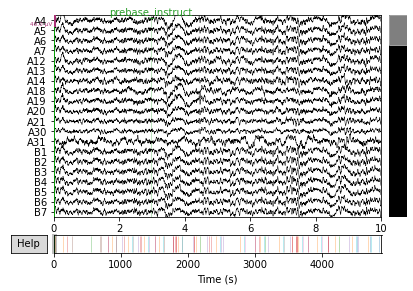

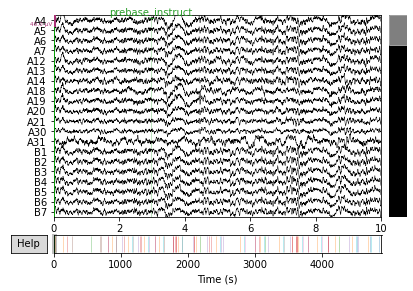

In [ ]:
raw.plot()

#Intial ICA - Testing and Source Estimation

We are doing singnal decompostion using independent component analysis.It estimates compoenets from the MNE.Raw object.Before the ICA process is started the data or signal is whitened.That is, the sphering transformation is applied to the dataset.The sphering transformation is used to convert a vector of random variables with a know covariance matrix to vector whose covariance matrix is identity matrix.It is also called whitening because it reduces the data to white noise vector.This step also helps to introduce the option of dimensionality reduction . 

Fitting ICA to data using 134 channels (please be patient, this may take a while)
Inferring max_pca_components from picks
Selecting by number: 20 components
Fitting ICA took 80.0s.
    Using multitaper spectrum estimation with 7 DPSS windows
Not setting metadata
Not setting metadata
2444 matching events found
No baseline correction applied
0 projection items activated
0 bad epochs dropped
Not setting metadata
Not setting metadata
2444 matching events found
No baseline correction applied
0 projection items activated
0 bad epochs dropped


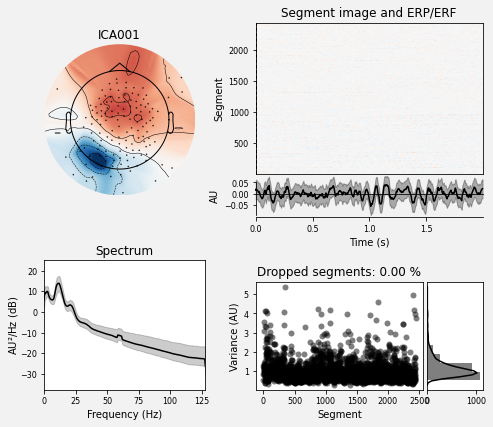

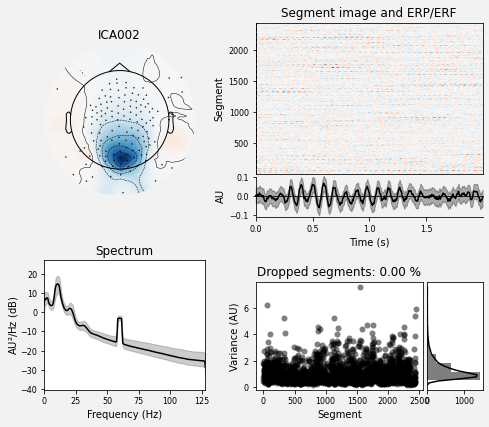

[<Figure size 504x432 with 6 Axes>, <Figure size 504x432 with 6 Axes>]

In [ ]:
ica = mne.preprocessing.ICA(n_components=20, random_state=97, max_iter=800)
ica.fit(raw)
ica.exclude = [1, 2]
ica.plot_properties(raw, picks=ica.exclude)

#Raw EEGLAB data

The MNE library has packages for using .set and .fdt format files.They are part of EEGLAB toolbox.The subitable method of MNE library is used and the data is imported as a Raw data which can be interpreted in a way suitable to us.

In [ ]:
stim_data = np.zeros((1, len(raw.times)))
info = mne.create_info(ch_names = ['STI'],sfreq = raw.info['sfreq'], ch_types = 'stim')
stim_raw = mne.io.RawArray(stim_data, info)
raw.add_channels([stim_raw], force_update_info=True)
raw.add_events(events = events,stim_channel= ['STI'])

Creating RawArray with float64 data, n_channels=1, n_times=1251328
    Range : 0 ... 1251327 =      0.000 ...  4887.996 secs
Ready.


<RawEEGLAB | sub-3_task-ImaginedEmotion_eeg.fdt, 135 x 1251328 (4888.0 s), ~1.26 GB, data loaded>

In [ ]:
raw.times

array([0.00000000e+00, 3.90625000e-03, 7.81250000e-03, ...,
       4.88798828e+03, 4.88799219e+03, 4.88799609e+03])

In [ ]:
df_events

value  randNumCol        onset
0              prebase_instruct           3     2.949219
1                       prebase           5    13.398438
2   FeelingItInstructionsButton           4   133.468750
3         InstructionsForEnding           2   200.472656
4                         relax           5   264.941406
..                          ...         ...          ...
89                       press1           5  4541.606250
90                         exit           5  4692.035156
91            postbase_instruct           3  4722.035156
92                     postbase           4  4733.164062
93                 ExitThankYou           4  4853.667969

[94 rows x 3 columns]

In [ ]:
dicc = df_events['value'].to_dict()
dic_event_val = df_events['onset'].to_dict()
print(len(dicc) == len(dic_event_val))

True


In [ ]:
event_id_set = set(dicc.values())
val = [x for x in range(1,len(event_id_set)+1)]
event_id_set_dict = dict(zip(event_id_set,val))
event_id_dict = dict(zip(event_id_set,val))

In [ ]:
import math
events = []
for j in range(0,len(dicc)):
  ss = dicc[j]
  ev_id = event_id_set_dict[ss]
  ls = [math.ceil(float(dic_event_val[j])),0,ev_id]
  events.append(ls)


In [ ]:
events = np.array(events)
np.set_printoptions(suppress=True)

dicc

{0: 'prebase_instruct',
 1: 'prebase',
 2: 'FeelingItInstructionsButton',
 3: 'InstructionsForEnding',
 4: 'relax',
 5: 'ImaginationSuggestions',
 6: 'awe',
 7: 'awe',
 8: 'press1',
 9: 'press',
 10: 'exit',
 11: 'enter',
 12: 'frustration',
 13: 'press1',
 14: 'press',
 15: 'exit',
 16: 'enter',
 17: 'joy',
 18: 'press1',
 19: 'press',
 20: 'press',
 21: 'exit',
 22: 'enter',
 23: 'anger',
 24: 'press1',
 25: 'press',
 26: 'exit',
 27: 'enter',
 28: 'happy',
 29: 'press1',
 30: 'press',
 31: 'press',
 32: 'press',
 33: 'press',
 34: 'press',
 35: 'exit',
 36: 'enter',
 37: 'sad',
 38: 'press1',
 39: 'press',
 40: 'press',
 41: 'exit',
 42: 'enter',
 43: 'love',
 44: 'press1',
 45: 'press',
 46: 'press',
 47: 'exit',
 48: 'enter',
 49: 'grief',
 50: 'press1',
 51: 'exit',
 52: 'enter',
 53: 'compassion',
 54: 'press1',
 55: 'press',
 56: 'press',
 57: 'exit',
 58: 'enter',
 59: 'fear',
 60: 'press1',
 61: 'exit',
 62: 'enter',
 63: 'content',
 64: 'press1',
 65: 'press',
 66: 'press',


In [ ]:
baseline = (None, 0)
tmin = -0.2  # start of each epoch (200ms before the trigger)
tmax = 0.5 
epochs = mne.Epochs(raw,events, event_id_set_dict, tmin, tmax, proj=True,
                    baseline=baseline)
epochs

Not setting metadata
Not setting metadata
94 matching events found
Applying baseline correction (mode: mean)
0 projection items activated


<Epochs |  94 events (good & bad), -0.199219 - 0.5 sec, baseline [None, 0], ~383 kB, data not loaded,
 'ExitThankYou': 1
 'FeelingItInstructionsButton': 1
 'ImaginationSuggestions': 1
 'InstructionsForEnding': 1
 'anger': 1
 'awe': 2
 'compassion': 1
 'content': 1
 'disgust': 1
 'enter': 14
 'excite': 1
 'exit': 15
 'fear': 1
 'frustration': 1
 'grief': 1
 'happy': 1
 'jealousy': 1
 'joy': 1
 'love': 1
 'postbase': 1
 'postbase_instruct': 1
 'prebase': 1
 'prebase_instruct': 1
 'press': 25
 'press1': 15
 'relax': 1
 'relief': 1
 'sad': 1>

In [ ]:
noise_cov = mne.compute_covariance(
    epochs, tmax=0., method=['shrunk', 'empirical'], rank=None, verbose=True)

Loading data for 25 events and 180 original time points ...
0 bad epochs dropped
Loading data for 1 events and 180 original time points ...
0 bad epochs dropped
Loading data for 1 events and 180 original time points ...
0 bad epochs dropped
Loading data for 1 events and 180 original time points ...
0 bad epochs dropped
Loading data for 1 events and 180 original time points ...
0 bad epochs dropped
Loading data for 1 events and 180 original time points ...
0 bad epochs dropped
Loading data for 1 events and 180 original time points ...
0 bad epochs dropped
Loading data for 1 events and 180 original time points ...
0 bad epochs dropped
Loading data for 15 events and 180 original time points ...
0 bad epochs dropped
Loading data for 1 events and 180 original time points ...
0 bad epochs dropped
Loading data for 1 events and 180 original time points ...
0 bad epochs dropped
Loading data for 2 events and 180 original time points ...
0 bad epochs dropped
Loading data for 1 events and 180 orig

Computing rank from covariance with rank=None
    Using tolerance 7.7e-13 (2.2e-16 eps * 134 dim * 26  max singular value)
    Estimated rank (eeg): 134
    EEG: rank 134 computed from 134 data channels with 0 projectors


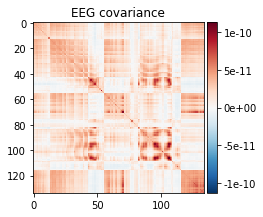

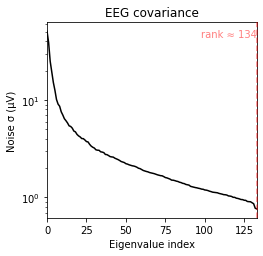

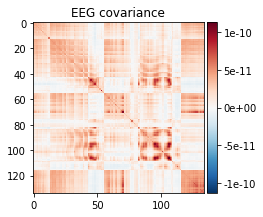

In [ ]:
fig_cov, fig_spectra = mne.viz.plot_cov(noise_cov, raw.info)
fig_cov

#Raw MNE Object to Pandas DataFrame

THe Mne.io.raw provides to_data_frame method for converting the EEG singnal value in mV into a dataset across all channels.There are few parameters which are essential in getting the data frame of the correct size.The *pick* parameter in to_data_frame method  is used to select channel. In order to get the data_frame from the entire dataset we can either select *eeg* or we select it at its default value.The parameter *index* is essential because we need *time* in Mili Second as the Index because while plotting this make uderstanding easier.The events can easily be added to df when te index of both the events df and df from raw are same.

In [ ]:
df = raw.to_data_frame(picks=['eeg'],index = 'time')
df

channel         A4         A5         A6  ...        H16        H17        H22
time                                      ...                                 
0        -8.498532  -2.588827  -0.430165  ... -10.359653 -12.532552  -6.844510
4       -12.445525  -4.520977  -3.054580  ... -10.008599 -14.208730  -8.601177
8        -9.568233  -1.377460   0.179830  ...  -7.144510 -12.252280  -5.721925
12       -1.052974   6.152110   8.771744  ...  -2.614768  -6.565799  -0.367519
16        7.051592  13.054130  15.920407  ...   3.720688  -0.947501   5.322597
...            ...        ...        ...  ...        ...        ...        ...
4887980   0.965185  -0.571775  -3.019193  ...  24.069057  27.080025  21.494804
4887984  -4.058957  -2.311432  -4.196495  ...  11.900069  13.483120  12.526105
4887988 -10.025208  -4.810400  -7.639476  ...   4.324333   3.916586   6.261456
4887992  -8.996855  -1.472367  -7.728551  ...   1.756496  -1.232258   5.877193
4887996  -5.952171   1.823074  -4.221234  ...  -0.377762  -8.454849   4.440352

[1251328 rows x 134 columns]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1251328 entries, 0 to 4887996
Columns: 134 entries, A4 to H22
dtypes: float64(134)
memory usage: 1.3 GB


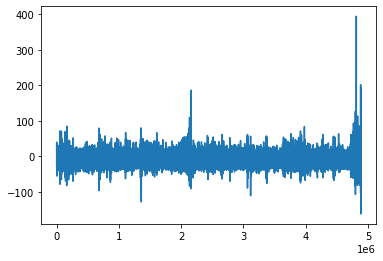

In [ ]:
import matplotlib.pyplot as plt #Simple visualization of the dataset using 'A4' Channel electrode
plt.plot(df['A4'])
plt.show()

#Checking whether data follows any specific Probability Distirbtion


The distribution to be checker are Gaussain, Student - t, Chi - Squared, Weibull,Inverse Gaussian, Uniform, Log Norm and Gamma Distribution.

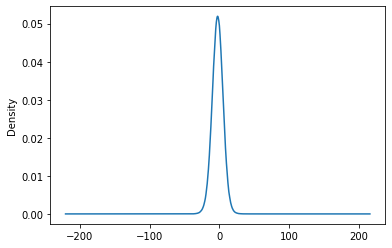

In [ ]:
mean_all = df.mean().to_list()
mean_all_gau = [x/134 for x in mean_all]
df['B17'].plot.kde()
column = df.columns.to_list()

In [ ]:
def standarise(column,pct,pct_lower):
    sc = StandardScaler() 
    y = df[column][df[column].notnull()].to_list()
    y.sort()
    len_y = len(y)
    y = y[int(pct_lower * len_y):int(len_y * pct)]
    len_y = len(y)
    yy=([[x] for x in y])
    sc.fit(yy)
    y_std =sc.transform(yy)
    y_std = y_std.flatten()
    return y_std,len_y,y

In [ ]:
def fit_distribution(column,pct,pct_lower):
    y_std,size,y_org = standarise(column,pct,pct_lower)
    dist_names = ['weibull_min','norm','weibull_max','beta',
                 'invgauss','uniform','gamma','expon', 'lognorm','pearson3','triang']

    chi_square_statistics = []
    percentile_bins = np.linspace(0,100,11)
    percentile_cutoffs = np.percentile(y_std, percentile_bins)
    observed_frequency, bins = (np.histogram(y_std, bins=percentile_cutoffs))
    cum_observed_frequency = np.cumsum(observed_frequency)
    for distribution in dist_names:
        dist = getattr(scipy.stats, distribution)
        param = dist.fit(y_std)
        print("{}\n{}\n".format(dist, param))
        cdf_fitted = dist.cdf(percentile_cutoffs, *param)
        expected_frequency = []
        for bin in range(len(percentile_bins)-1):
            expected_cdf_area = cdf_fitted[bin+1] - cdf_fitted[bin]
            expected_frequency.append(expected_cdf_area)
        expected_frequency = np.array(expected_frequency) * size
        cum_expected_frequency = np.cumsum(expected_frequency)
        ss = round(sum (((cum_expected_frequency - cum_observed_frequency) ** 2) / cum_observed_frequency),0)
        chi_square_statistics.append(ss)
    results = pd.DataFrame()
    results['Distribution'] = dist_names
    results['chi_square'] = chi_square_statistics
    results.sort_values(['chi_square'], inplace=True)


    print ('\nDistributions listed by Betterment of fit:')
    print ('............................................')
    print (results)

In [ ]:
#fit_distribution('A4',0.999,0.001)


#NeuroDSP

In [ ]:
raw = raw.pick_types(meg=False, eeg=True, eog=False, exclude='bads')

In [ ]:
fs = raw.info['sfreq']

In [ ]:
ch_label = 'A4'
t_start = 00000
t_stop = 40000

In [ ]:
sig, times = raw.get_data(picks = 'A4', return_times=True)
sig = np.squeeze(sig)

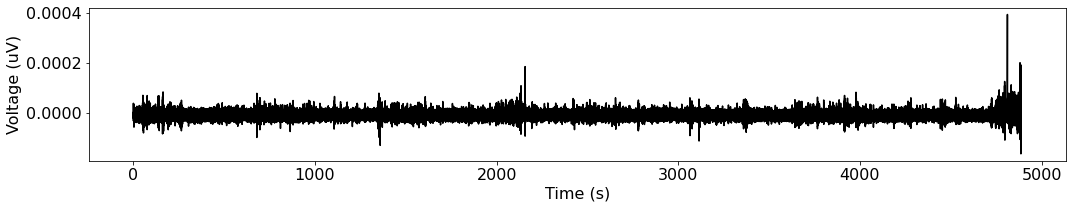

In [ ]:
plot_time_series(times, sig)

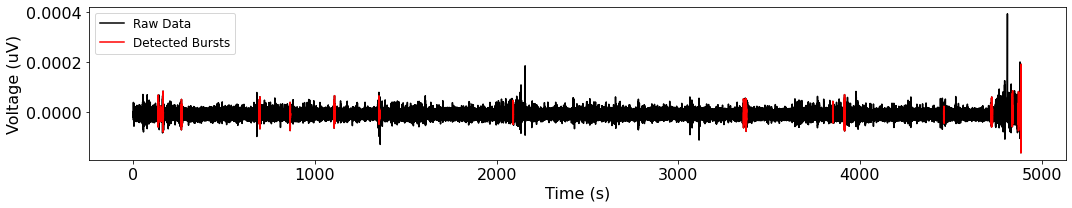

In [ ]:
amp_dual_thresh = (1., 1.5)
freqs, powers = compute_spectrum(sig, fs, method='welch', avg_type='median')
freqs, powers = trim_spectrum(freqs, powers, [3, 30])
peak_cf = freqs[np.argmax(powers)]
f_range = (peak_cf-2, peak_cf+2)
bursting = detect_bursts_dual_threshold(sig, fs, amp_dual_thresh, f_range)
plot_bursts(times, sig, bursting, labels=['Raw Data', 'Detected Bursts'])

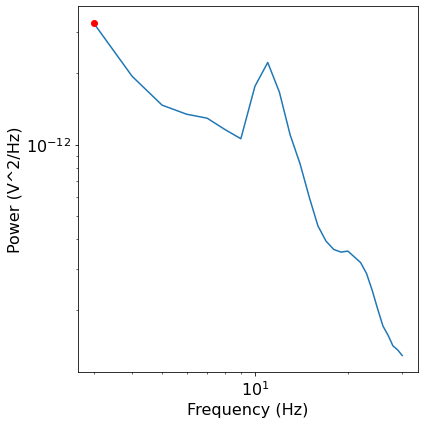

In [ ]:
plot_power_spectra(freqs, powers)
plt.plot(freqs[np.argmax(powers)], np.max(powers), '.r', ms=12)

In [ ]:
peak_cf

3.0

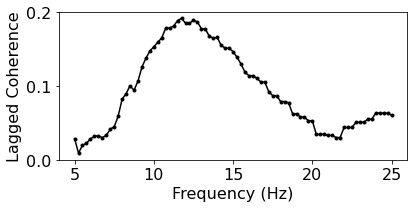

In [ ]:
f_range = (5, 25, 0.25)
lcs, freqs = compute_lagged_coherence(sig, fs, f_range, return_spectrum=True)
plot_lagged_coherence(freqs, lcs)

In [ ]:
max_freq = freqs[np.argmax(lcs)]
max_score = np.max(lcs)

print('The frequency with the greatest rhythmicity is {:1.1f} Hz '\
      'with a lagged coherence score of {:1.2f}.'.format(max_freq, max_score))

The frequency with the greatest rhythmicity is 11.8 Hz with a lagged coherence score of 0.19.


In [ ]:
t_start =  0000
t_stop = 60000
max_freq = np.zeros(len(raw.ch_names))
max_score = np.zeros(len(raw.ch_names))
for ind, ch_label in enumerate(raw.ch_names):
    cur_sig = np.squeeze(raw.get_data(mne.pick_channels(raw.ch_names, [ch_label]),
                                      start=t_start, stop=t_stop))
    cur_lcs, cur_freqs = compute_lagged_coherence(cur_sig, fs, f_range, return_spectrum=True)

    # Collect data of interest: frequency of max rhythmicity & associated rhythmicity value
    max_freq[ind] = cur_freqs[np.argmax(cur_lcs)]
    max_score[ind] = np.max(cur_lcs)

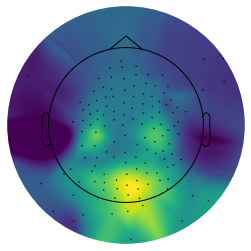

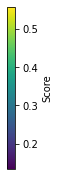

In [ ]:

vmin, vmax = np.min(max_score), np.max(max_score)
plot_topomap(max_score, raw.info, cmap=cm.viridis, vmin=vmin, vmax=vmax, contours=0)

plt.figure(figsize=[2, 4])
sm = cm.ScalarMappable(cmap='viridis', norm=colors.Normalize(vmin=vmin, vmax=vmax))
sm.set_array(np.linspace(vmin, vmax))
cbar = plt.colorbar(sm, orientation='vertical', label='Score')
plt.gca().set_visible(False); plt.gcf().subplots_adjust(right=0.5)

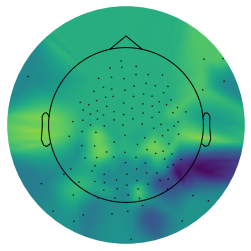

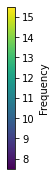

In [ ]:
vmin, vmax = np.min(max_freq)-2, np.max(max_freq)+2
plot_topomap(max_freq, raw.info, cmap=cm.viridis, vmin=vmin, vmax=vmax, contours=0)

plt.figure(figsize=[2, 4])
sm = cm.ScalarMappable(cmap='viridis', norm=colors.Normalize(vmin=vmin, vmax=vmax))
sm.set_array(np.linspace(vmin, vmax))
cbar = plt.colorbar(sm, orientation='vertical', label='Frequency')
plt.gca().set_visible(False); plt.gcf().subplots_adjust(right=0.5)


In [ ]:
# Set sampling rate, and create a times vector for plotting
fs = 1000
times = create_times(len(sig)/fs, fs)

f_range = (13, 30)
pha = phase_by_time(sig, fs, f_range)

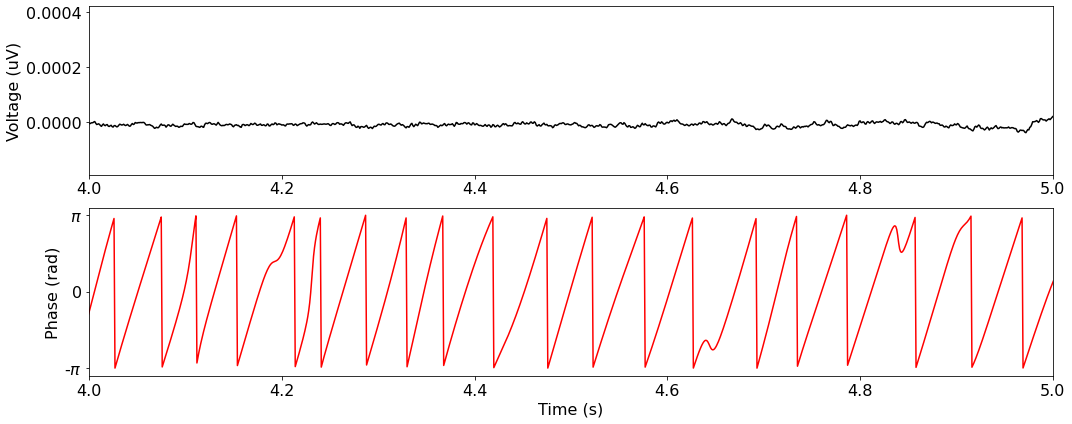

In [ ]:

_, axs = plt.subplots(2, 1, figsize=(15, 6))
plot_time_series(times, sig, xlim=[4, 5], xlabel=None, ax=axs[0])
plot_instantaneous_measure(times, pha, colors='r', xlim=[4, 5], ax=axs[1])

In [ ]:
amp = amp_by_time(sig, fs, f_range)

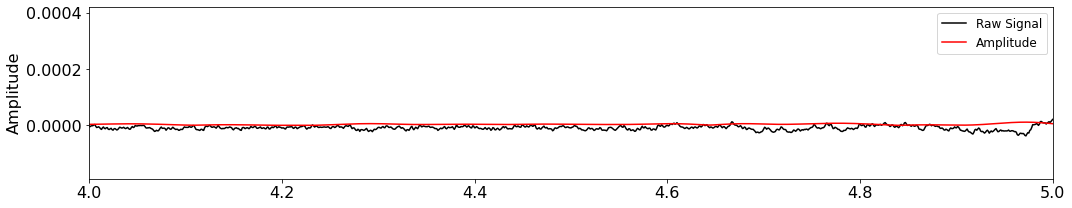

In [ ]:

plot_instantaneous_measure(times, [sig, amp], 'amplitude',
                           labels=['Raw Signal', 'Amplitude'],
                           xlim=[4, 5], xlabel=None)

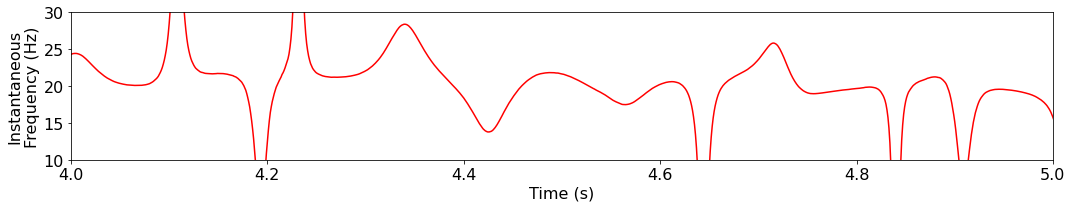

In [ ]:
i_f = freq_by_time(sig, fs, f_range)
plot_instantaneous_measure(times, i_f, 'frequency', label='Instantaneous Frequency',
                           colors='r', xlim=[4, 5], ylim=[10, 30])

#Machine Learning


In [ ]:
#

In [ ]:
import datetime
from datetime import date
import pandas as pd

from plotly import __version__
%matplotlib inline

import plotly.offline as pyo
import plotly.graph_objs as go
from plotly.offline import iplot

import cufflinks as cf
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot 


cf.go_offline()

In [ ]:
init_notebook_mode(connected=False)

In [ ]:
def configure_plotly_browser_state():
  import IPython
  display(IPython.core.display.HTML('''
        <script src="/static/components/requirejs/require.js"></script>
        <script>
          requirejs.config({
            paths: {
              base: '/static/base',
              plotly: 'https://cdn.plot.ly/plotly-1.5.1.min.js?noext',
            },
          });
        </script>
        '''))

In [ ]:
configure_plotly_browser_state()
y1 = [x for x in range (0,1000)] 
x1 = df.tail(1000)
x1['A4'].iplot()
plt.show()

### ***Reading the data into Numpy array***

The data is present in form of .set format in the Dataset so it is loaded as a RAW object in each loop using that the data is obtained.We convert the entire signal wave over the entire duration into smallert wavelets of 20 Second duration. We are doing so beacause becuase the 20 Second wavelet is centered around a event.Here the event constitutes a event of arousal of emotion. The classes used in this dataset are loosely based on Arousal-Valence Model.These wavelets along with their labels are loaded as Numpy arrays

In [ ]:
df_events
onset_val = df_events['onset'].tolist()

In [ ]:
wavelet = []
wav = []
labs = []
for j in tqdm(range(len(df_events)//2)):
  i = 9
  s = '/sub-{0}/eeg/sub-{1}_task-ImaginedEmotion_eeg.set'.format(i,i)#Location of DATASET
  raw = mne.io.read_raw_eeglab(input_fname = os.getcwd()+s) #Current Working Directory
  if (float(onset_val[j]) - 10) <= 0:
    t_min = 0
    t_max = float(onset_val[j]) + 20  
    if t_max - t_min != 20:
      ss = 20 - t_max - t_min
    if ss<0:
      t_max = t_max + ss
    else:
      t_max = t_max + ss
  else:
    t_min = float(onset_val[j]) - 10
    t_max = float(onset_val[j]) + 10 

  
  print(t_max,t_min,ss)
  ss = dicc[j]
  raw.crop(tmin = t_min ,tmax = t_max ).load_data()
  raw_arr = raw.get_data(picks = ['eeg'] , return_times = False)
  raw_arr = raw_arr*10**6 #Converting volts to MicroVolts
  wavelet.append(cp.array(raw_arr))
  labs.append(event_id_set_dict[ss])

In [ ]:
def ret_wavelts(i):
  '''
  Generates a Numpy array from the EEG Wave signal

  Input:
  :i This is index of the Dataset

  Output:
  :return It returns a the wavelets and labels

  '''
  wavs = [] 
  labs = []
  s_e = '/sub-{0}/eeg/sub-{1}_task-ImaginedEmotion_events.tsv'.format(i,i) #Directory of the Dataset
  df_events = pd.read_csv(os.getcwd()+s_e,sep = '\t') # Delimiter is /t
  dicc = df_events['value'].to_dict()
  onset_val = df_events['onset'].tolist() #Onset value of Each event is convereted to a list
  for j in tqdm(range((len(df_events)-1))):
    s = '/sub-{0}/eeg/sub-{1}_task-ImaginedEmotion_eeg.set'.format(i,i)
    raw = mne.io.read_raw_eeglab(input_fname = os.getcwd()+s) #Mne Libraray is used to load the wave from .set file
    if (float(onset_val[j]) - 10) <= 0:
      t_min = 0
      t_max = float(onset_val[j]) + 20  
      if t_max - t_min != 20:
        ss = 20 - t_max - t_min
      else:
        ss = 0
      if ss<0:
        t_max = t_max + ss
      else:
        t_max = t_max + ss
    else:
      t_min = float(onset_val[j]) - 10
      t_max = float(onset_val[j]) + 10
    ss = dicc[j]
    print(t_max,t_min,ss) #Prints the 20 Second window and the Event the occurs in that wavelet
    
    raw.crop(tmin = t_min ,tmax = t_max ).load_data() #The wave Signal is croped 
    raw_arr = raw.get_data(picks = ['eeg'] , return_times = False)
    raw_arr = raw_arr*(10**6) #The data is converted to MicroVolts to Volts
    event_id_set = set(dicc.values())
    val = [x for x in range(1,len(event_id_set)+1)]
    event_id_set_dict = dict(zip(event_id_set,val))
    event_id_dict = dict(zip(event_id_set,val))
    wavs.append(cp.array(raw_arr))
    labs.append(event_id_set_dict[ss])
  return wavs,labs


In [ ]:
was,las = ret_wavelts(1) #The Wavelets generated for Dataset at 1 i.e  for subject 1

  0%|          | 0/200 [00:00<?, ?it/s]

Reading /content/drive/My Drive/eee_eeg_proj/ds002887-download/sub-1/eeg/sub-1_task-ImaginedEmotion_eeg.fdt
20.0 0 InitialInstructions
Reading 0 ... 5120  =      0.000 ...    20.000 secs...


  0%|          | 1/200 [00:02<08:22,  2.53s/it]

Reading /content/drive/My Drive/eee_eeg_proj/ds002887-download/sub-1/eeg/sub-1_task-ImaginedEmotion_eeg.fdt
20.0 0 prebase_instruct
Reading 0 ... 5120  =      0.000 ...    20.000 secs...


  1%|          | 2/200 [00:02<06:12,  1.88s/it]

Reading /content/drive/My Drive/eee_eeg_proj/ds002887-download/sub-1/eeg/sub-1_task-ImaginedEmotion_eeg.fdt
127.50390625 107.50390625 prebase
Reading 0 ... 5120  =      0.000 ...    20.000 secs...


  2%|▏         | 3/200 [00:03<04:55,  1.50s/it]

Reading /content/drive/My Drive/eee_eeg_proj/ds002887-download/sub-1/eeg/sub-1_task-ImaginedEmotion_eeg.fdt
247.50390625 227.50390625 exit
Reading 0 ... 5120  =      0.000 ...    20.000 secs...


  2%|▏         | 4/200 [00:04<04:02,  1.24s/it]

Reading /content/drive/My Drive/eee_eeg_proj/ds002887-download/sub-1/eeg/sub-1_task-ImaginedEmotion_eeg.fdt
247.5078125 227.5078125 FeelingItInstructionsButton
Reading 0 ... 5120  =      0.000 ...    20.000 secs...


  2%|▎         | 5/200 [00:04<03:07,  1.04it/s]

Reading /content/drive/My Drive/eee_eeg_proj/ds002887-download/sub-1/eeg/sub-1_task-ImaginedEmotion_eeg.fdt
247.78125 227.78125 InstructionsForEnding
Reading 0 ... 5120  =      0.000 ...    20.000 secs...


  3%|▎         | 6/200 [00:04<02:33,  1.26it/s]

Reading /content/drive/My Drive/eee_eeg_proj/ds002887-download/sub-1/eeg/sub-1_task-ImaginedEmotion_eeg.fdt
314.7890625 294.7890625 relax
Reading 0 ... 5120  =      0.000 ...    20.000 secs...


  4%|▎         | 7/200 [00:05<02:33,  1.26it/s]

Reading /content/drive/My Drive/eee_eeg_proj/ds002887-download/sub-1/eeg/sub-1_task-ImaginedEmotion_eeg.fdt
378.8203125 358.8203125 ImaginationSuggestions
Reading 0 ... 5120  =      0.000 ...    20.000 secs...


  4%|▍         | 8/200 [00:06<02:15,  1.42it/s]

Reading /content/drive/My Drive/eee_eeg_proj/ds002887-download/sub-1/eeg/sub-1_task-ImaginedEmotion_eeg.fdt
726.13671875 706.13671875 enter
Reading 0 ... 5120  =      0.000 ...    20.000 secs...


  4%|▍         | 9/200 [00:06<02:19,  1.37it/s]

Reading /content/drive/My Drive/eee_eeg_proj/ds002887-download/sub-1/eeg/sub-1_task-ImaginedEmotion_eeg.fdt
726.26953125 706.26953125 awe
Reading 0 ... 5120  =      0.000 ...    20.000 secs...


  5%|▌         | 10/200 [00:07<01:55,  1.65it/s]

Reading /content/drive/My Drive/eee_eeg_proj/ds002887-download/sub-1/eeg/sub-1_task-ImaginedEmotion_eeg.fdt
790.3828125 770.3828125 press1
Reading 0 ... 5120  =      0.000 ...    20.000 secs...


  6%|▌         | 11/200 [00:07<01:53,  1.67it/s]

Reading /content/drive/My Drive/eee_eeg_proj/ds002887-download/sub-1/eeg/sub-1_task-ImaginedEmotion_eeg.fdt
792.33203125 772.33203125 press
Reading 0 ... 5120  =      0.000 ...    20.000 secs...


  6%|▌         | 12/200 [00:08<01:36,  1.95it/s]

Reading /content/drive/My Drive/eee_eeg_proj/ds002887-download/sub-1/eeg/sub-1_task-ImaginedEmotion_eeg.fdt
793.765625 773.765625 press
Reading 0 ... 5120  =      0.000 ...    20.000 secs...


  6%|▋         | 13/200 [00:08<01:31,  2.04it/s]

Reading /content/drive/My Drive/eee_eeg_proj/ds002887-download/sub-1/eeg/sub-1_task-ImaginedEmotion_eeg.fdt
808.1640625 788.1640625 press
Reading 0 ... 5120  =      0.000 ...    20.000 secs...


  7%|▋         | 14/200 [00:09<01:35,  1.94it/s]

Reading /content/drive/My Drive/eee_eeg_proj/ds002887-download/sub-1/eeg/sub-1_task-ImaginedEmotion_eeg.fdt
828.4453125 808.4453125 press
Reading 0 ... 5120  =      0.000 ...    20.000 secs...


  8%|▊         | 15/200 [00:09<01:48,  1.71it/s]

Reading /content/drive/My Drive/eee_eeg_proj/ds002887-download/sub-1/eeg/sub-1_task-ImaginedEmotion_eeg.fdt
830.86328125 810.86328125 press
Reading 0 ... 5120  =      0.000 ...    20.000 secs...


  8%|▊         | 16/200 [00:10<01:32,  1.99it/s]

Reading /content/drive/My Drive/eee_eeg_proj/ds002887-download/sub-1/eeg/sub-1_task-ImaginedEmotion_eeg.fdt
843.74609375 823.74609375 press
Reading 0 ... 5120  =      0.000 ...    20.000 secs...


  8%|▊         | 17/200 [00:10<01:35,  1.91it/s]

Reading /content/drive/My Drive/eee_eeg_proj/ds002887-download/sub-1/eeg/sub-1_task-ImaginedEmotion_eeg.fdt
844.6640625 824.6640625 press
Reading 0 ... 5120  =      0.000 ...    20.000 secs...


  9%|▉         | 18/200 [00:11<01:31,  1.99it/s]

Reading /content/drive/My Drive/eee_eeg_proj/ds002887-download/sub-1/eeg/sub-1_task-ImaginedEmotion_eeg.fdt
875.61328125 855.61328125 press
Reading 0 ... 5120  =      0.000 ...    20.000 secs...


 10%|▉         | 19/200 [00:11<01:36,  1.87it/s]

Reading /content/drive/My Drive/eee_eeg_proj/ds002887-download/sub-1/eeg/sub-1_task-ImaginedEmotion_eeg.fdt
917.9921875 897.9921875 exit
Reading 0 ... 5120  =      0.000 ...    20.000 secs...


 10%|█         | 20/200 [00:12<01:32,  1.94it/s]

Reading /content/drive/My Drive/eee_eeg_proj/ds002887-download/sub-1/eeg/sub-1_task-ImaginedEmotion_eeg.fdt
965.87109375 945.87109375 enter
Reading 0 ... 5120  =      0.000 ...    20.000 secs...


 10%|█         | 21/200 [00:12<01:30,  1.97it/s]

Reading /content/drive/My Drive/eee_eeg_proj/ds002887-download/sub-1/eeg/sub-1_task-ImaginedEmotion_eeg.fdt
965.94140625 945.94140625 frustration
Reading 0 ... 5120  =      0.000 ...    20.000 secs...


 11%|█         | 22/200 [00:13<01:19,  2.23it/s]

Reading /content/drive/My Drive/eee_eeg_proj/ds002887-download/sub-1/eeg/sub-1_task-ImaginedEmotion_eeg.fdt
1044.609375 1024.609375 press1
Reading 0 ... 5120  =      0.000 ...    20.000 secs...


 12%|█▏        | 23/200 [00:13<01:31,  1.94it/s]

Reading /content/drive/My Drive/eee_eeg_proj/ds002887-download/sub-1/eeg/sub-1_task-ImaginedEmotion_eeg.fdt
1057.45703125 1037.45703125 press
Reading 0 ... 5120  =      0.000 ...    20.000 secs...


 12%|█▏        | 24/200 [00:14<01:19,  2.21it/s]

Reading /content/drive/My Drive/eee_eeg_proj/ds002887-download/sub-1/eeg/sub-1_task-ImaginedEmotion_eeg.fdt
1064.37109375 1044.37109375 press
Reading 0 ... 5120  =      0.000 ...    20.000 secs...


 12%|█▎        | 25/200 [00:14<01:17,  2.26it/s]

Reading /content/drive/My Drive/eee_eeg_proj/ds002887-download/sub-1/eeg/sub-1_task-ImaginedEmotion_eeg.fdt
1076.30078125 1056.30078125 press
Reading 0 ... 5120  =      0.000 ...    20.000 secs...


 13%|█▎        | 26/200 [00:15<01:19,  2.18it/s]

Reading /content/drive/My Drive/eee_eeg_proj/ds002887-download/sub-1/eeg/sub-1_task-ImaginedEmotion_eeg.fdt
1090.53125 1070.53125 press
Reading 0 ... 5120  =      0.000 ...    20.000 secs...


 14%|█▎        | 27/200 [00:15<01:18,  2.20it/s]

Reading /content/drive/My Drive/eee_eeg_proj/ds002887-download/sub-1/eeg/sub-1_task-ImaginedEmotion_eeg.fdt
1108.41015625 1088.41015625 press
Reading 0 ... 5120  =      0.000 ...    20.000 secs...


 14%|█▍        | 28/200 [00:15<01:15,  2.27it/s]

Reading /content/drive/My Drive/eee_eeg_proj/ds002887-download/sub-1/eeg/sub-1_task-ImaginedEmotion_eeg.fdt
1121.79296875 1101.79296875 press
Reading 0 ... 5120  =      0.000 ...    20.000 secs...


 14%|█▍        | 29/200 [00:16<01:29,  1.91it/s]

Reading /content/drive/My Drive/eee_eeg_proj/ds002887-download/sub-1/eeg/sub-1_task-ImaginedEmotion_eeg.fdt
1137.5234375 1117.5234375 press
Reading 0 ... 5120  =      0.000 ...    20.000 secs...


 15%|█▌        | 30/200 [00:17<01:27,  1.94it/s]

Reading /content/drive/My Drive/eee_eeg_proj/ds002887-download/sub-1/eeg/sub-1_task-ImaginedEmotion_eeg.fdt
1140.60546875 1120.60546875 press
Reading 0 ... 5120  =      0.000 ...    20.000 secs...


 16%|█▌        | 31/200 [00:17<01:17,  2.19it/s]

Reading /content/drive/My Drive/eee_eeg_proj/ds002887-download/sub-1/eeg/sub-1_task-ImaginedEmotion_eeg.fdt
1169.8046875 1149.8046875 press
Reading 0 ... 5120  =      0.000 ...    20.000 secs...


 16%|█▌        | 32/200 [00:17<01:23,  2.01it/s]

Reading /content/drive/My Drive/eee_eeg_proj/ds002887-download/sub-1/eeg/sub-1_task-ImaginedEmotion_eeg.fdt
1204.21875 1184.21875 press
Reading 0 ... 5120  =      0.000 ...    20.000 secs...


 16%|█▋        | 33/200 [00:18<01:24,  1.98it/s]

Reading /content/drive/My Drive/eee_eeg_proj/ds002887-download/sub-1/eeg/sub-1_task-ImaginedEmotion_eeg.fdt
1234.4609375 1214.4609375 exit
Reading 0 ... 5120  =      0.000 ...    20.000 secs...


 17%|█▋        | 34/200 [00:19<01:28,  1.87it/s]

Reading /content/drive/My Drive/eee_eeg_proj/ds002887-download/sub-1/eeg/sub-1_task-ImaginedEmotion_eeg.fdt
1282.234375 1262.234375 enter
Reading 0 ... 5120  =      0.000 ...    20.000 secs...


 18%|█▊        | 35/200 [00:19<01:27,  1.88it/s]

Reading /content/drive/My Drive/eee_eeg_proj/ds002887-download/sub-1/eeg/sub-1_task-ImaginedEmotion_eeg.fdt
1282.30859375 1262.30859375 joy
Reading 0 ... 5120  =      0.000 ...    20.000 secs...


 18%|█▊        | 36/200 [00:19<01:16,  2.14it/s]

Reading /content/drive/My Drive/eee_eeg_proj/ds002887-download/sub-1/eeg/sub-1_task-ImaginedEmotion_eeg.fdt
1367.70703125 1347.70703125 press1
Reading 0 ... 5120  =      0.000 ...    20.000 secs...


 18%|█▊        | 37/200 [00:20<01:22,  1.97it/s]

Reading /content/drive/My Drive/eee_eeg_proj/ds002887-download/sub-1/eeg/sub-1_task-ImaginedEmotion_eeg.fdt
1401.3203125 1381.3203125 press
Reading 0 ... 5120  =      0.000 ...    20.000 secs...


 19%|█▉        | 38/200 [00:21<01:20,  2.01it/s]

Reading /content/drive/My Drive/eee_eeg_proj/ds002887-download/sub-1/eeg/sub-1_task-ImaginedEmotion_eeg.fdt
1409.9375 1389.9375 press
Reading 0 ... 5120  =      0.000 ...    20.000 secs...


 20%|█▉        | 39/200 [00:21<01:10,  2.27it/s]

Reading /content/drive/My Drive/eee_eeg_proj/ds002887-download/sub-1/eeg/sub-1_task-ImaginedEmotion_eeg.fdt
1412.65234375 1392.65234375 press
Reading 0 ... 5120  =      0.000 ...    20.000 secs...


 20%|██        | 40/200 [00:21<01:15,  2.12it/s]

Reading /content/drive/My Drive/eee_eeg_proj/ds002887-download/sub-1/eeg/sub-1_task-ImaginedEmotion_eeg.fdt
1415.16796875 1395.16796875 press
Reading 0 ... 5120  =      0.000 ...    20.000 secs...


 20%|██        | 41/200 [00:22<01:07,  2.36it/s]

Reading /content/drive/My Drive/eee_eeg_proj/ds002887-download/sub-1/eeg/sub-1_task-ImaginedEmotion_eeg.fdt
1425.984375 1405.984375 press
Reading 0 ... 5120  =      0.000 ...    20.000 secs...


 21%|██        | 42/200 [00:22<01:14,  2.13it/s]

Reading /content/drive/My Drive/eee_eeg_proj/ds002887-download/sub-1/eeg/sub-1_task-ImaginedEmotion_eeg.fdt
1428.53515625 1408.53515625 press
Reading 0 ... 5120  =      0.000 ...    20.000 secs...


 22%|██▏       | 43/200 [00:23<01:06,  2.38it/s]

Reading /content/drive/My Drive/eee_eeg_proj/ds002887-download/sub-1/eeg/sub-1_task-ImaginedEmotion_eeg.fdt
1431.21484375 1411.21484375 press
Reading 0 ... 5120  =      0.000 ...    20.000 secs...


 22%|██▏       | 44/200 [00:23<01:01,  2.52it/s]

Reading /content/drive/My Drive/eee_eeg_proj/ds002887-download/sub-1/eeg/sub-1_task-ImaginedEmotion_eeg.fdt
1433.69921875 1413.69921875 press
Reading 0 ... 5120  =      0.000 ...    20.000 secs...


 22%|██▎       | 45/200 [00:23<01:02,  2.47it/s]

Reading /content/drive/My Drive/eee_eeg_proj/ds002887-download/sub-1/eeg/sub-1_task-ImaginedEmotion_eeg.fdt
1441.56640625 1421.56640625 press
Reading 0 ... 5120  =      0.000 ...    20.000 secs...


 23%|██▎       | 46/200 [00:24<01:10,  2.18it/s]

Reading /content/drive/My Drive/eee_eeg_proj/ds002887-download/sub-1/eeg/sub-1_task-ImaginedEmotion_eeg.fdt
1444.18359375 1424.18359375 press
Reading 0 ... 5120  =      0.000 ...    20.000 secs...


 24%|██▎       | 47/200 [00:24<01:03,  2.41it/s]

Reading /content/drive/My Drive/eee_eeg_proj/ds002887-download/sub-1/eeg/sub-1_task-ImaginedEmotion_eeg.fdt
1447.3671875 1427.3671875 press
Reading 0 ... 5120  =      0.000 ...    20.000 secs...


 24%|██▍       | 48/200 [00:25<01:03,  2.41it/s]

Reading /content/drive/My Drive/eee_eeg_proj/ds002887-download/sub-1/eeg/sub-1_task-ImaginedEmotion_eeg.fdt
1472.34375 1452.34375 exit
Reading 0 ... 5120  =      0.000 ...    20.000 secs...


 24%|██▍       | 49/200 [00:25<01:11,  2.12it/s]

Reading /content/drive/My Drive/eee_eeg_proj/ds002887-download/sub-1/eeg/sub-1_task-ImaginedEmotion_eeg.fdt
1520.11328125 1500.11328125 enter
Reading 0 ... 5120  =      0.000 ...    20.000 secs...


 25%|██▌       | 50/200 [00:26<01:14,  2.03it/s]

Reading /content/drive/My Drive/eee_eeg_proj/ds002887-download/sub-1/eeg/sub-1_task-ImaginedEmotion_eeg.fdt
1520.18359375 1500.18359375 anger
Reading 0 ... 5120  =      0.000 ...    20.000 secs...


 26%|██▌       | 51/200 [00:26<01:05,  2.27it/s]

Reading /content/drive/My Drive/eee_eeg_proj/ds002887-download/sub-1/eeg/sub-1_task-ImaginedEmotion_eeg.fdt
1577.53125 1557.53125 press1
Reading 0 ... 5120  =      0.000 ...    20.000 secs...


 26%|██▌       | 52/200 [00:27<01:12,  2.05it/s]

Reading /content/drive/My Drive/eee_eeg_proj/ds002887-download/sub-1/eeg/sub-1_task-ImaginedEmotion_eeg.fdt
1583.98046875 1563.98046875 press
Reading 0 ... 5120  =      0.000 ...    20.000 secs...


 26%|██▋       | 53/200 [00:27<01:10,  2.08it/s]

Reading /content/drive/My Drive/eee_eeg_proj/ds002887-download/sub-1/eeg/sub-1_task-ImaginedEmotion_eeg.fdt
1585.53125 1565.53125 press
Reading 0 ... 5120  =      0.000 ...    20.000 secs...


 27%|██▋       | 54/200 [00:27<01:02,  2.33it/s]

Reading /content/drive/My Drive/eee_eeg_proj/ds002887-download/sub-1/eeg/sub-1_task-ImaginedEmotion_eeg.fdt
1586.98046875 1566.98046875 press
Reading 0 ... 5120  =      0.000 ...    20.000 secs...


 28%|██▊       | 55/200 [00:28<01:02,  2.33it/s]

Reading /content/drive/My Drive/eee_eeg_proj/ds002887-download/sub-1/eeg/sub-1_task-ImaginedEmotion_eeg.fdt
1588.6328125 1568.6328125 press
Reading 0 ... 5120  =      0.000 ...    20.000 secs...


 28%|██▊       | 56/200 [00:28<01:00,  2.36it/s]

Reading /content/drive/My Drive/eee_eeg_proj/ds002887-download/sub-1/eeg/sub-1_task-ImaginedEmotion_eeg.fdt
1590.24609375 1570.24609375 press
Reading 0 ... 5120  =      0.000 ...    20.000 secs...


 28%|██▊       | 57/200 [00:29<01:00,  2.36it/s]

Reading /content/drive/My Drive/eee_eeg_proj/ds002887-download/sub-1/eeg/sub-1_task-ImaginedEmotion_eeg.fdt
1591.89453125 1571.89453125 press
Reading 0 ... 5120  =      0.000 ...    20.000 secs...


 29%|██▉       | 58/200 [00:29<01:06,  2.13it/s]

Reading /content/drive/My Drive/eee_eeg_proj/ds002887-download/sub-1/eeg/sub-1_task-ImaginedEmotion_eeg.fdt
1593.2109375 1573.2109375 press
Reading 0 ... 5120  =      0.000 ...    20.000 secs...


 30%|██▉       | 59/200 [00:30<00:59,  2.37it/s]

Reading /content/drive/My Drive/eee_eeg_proj/ds002887-download/sub-1/eeg/sub-1_task-ImaginedEmotion_eeg.fdt
1599.16015625 1579.16015625 press
Reading 0 ... 5120  =      0.000 ...    20.000 secs...


 30%|███       | 60/200 [00:30<01:05,  2.14it/s]

Reading /content/drive/My Drive/eee_eeg_proj/ds002887-download/sub-1/eeg/sub-1_task-ImaginedEmotion_eeg.fdt
1600.609375 1580.609375 press
Reading 0 ... 5120  =      0.000 ...    20.000 secs...


 30%|███       | 61/200 [00:31<00:58,  2.38it/s]

Reading /content/drive/My Drive/eee_eeg_proj/ds002887-download/sub-1/eeg/sub-1_task-ImaginedEmotion_eeg.fdt
1602.17578125 1582.17578125 press
Reading 0 ... 5120  =      0.000 ...    20.000 secs...


 31%|███       | 62/200 [00:31<00:58,  2.34it/s]

Reading /content/drive/My Drive/eee_eeg_proj/ds002887-download/sub-1/eeg/sub-1_task-ImaginedEmotion_eeg.fdt
1604.140625 1584.140625 press
Reading 0 ... 5120  =      0.000 ...    20.000 secs...


 32%|███▏      | 63/200 [00:31<00:59,  2.31it/s]

Reading /content/drive/My Drive/eee_eeg_proj/ds002887-download/sub-1/eeg/sub-1_task-ImaginedEmotion_eeg.fdt
1608.125 1588.125 press
Reading 0 ... 5120  =      0.000 ...    20.000 secs...


 32%|███▏      | 64/200 [00:32<01:04,  2.12it/s]

Reading /content/drive/My Drive/eee_eeg_proj/ds002887-download/sub-1/eeg/sub-1_task-ImaginedEmotion_eeg.fdt
1623.0859375 1603.0859375 press
Reading 0 ... 5120  =      0.000 ...    20.000 secs...


 32%|███▎      | 65/200 [00:32<00:58,  2.30it/s]

Reading /content/drive/My Drive/eee_eeg_proj/ds002887-download/sub-1/eeg/sub-1_task-ImaginedEmotion_eeg.fdt
1634.31640625 1614.31640625 press
Reading 0 ... 5120  =      0.000 ...    20.000 secs...


 33%|███▎      | 66/200 [00:33<01:04,  2.08it/s]

Reading /content/drive/My Drive/eee_eeg_proj/ds002887-download/sub-1/eeg/sub-1_task-ImaginedEmotion_eeg.fdt
1635.33203125 1615.33203125 press
Reading 0 ... 5120  =      0.000 ...    20.000 secs...


 34%|███▎      | 67/200 [00:33<00:57,  2.31it/s]

Reading /content/drive/My Drive/eee_eeg_proj/ds002887-download/sub-1/eeg/sub-1_task-ImaginedEmotion_eeg.fdt
1636.6015625 1616.6015625 press
Reading 0 ... 5120  =      0.000 ...    20.000 secs...


 34%|███▍      | 68/200 [00:36<02:27,  1.12s/it]

Reading /content/drive/My Drive/eee_eeg_proj/ds002887-download/sub-1/eeg/sub-1_task-ImaginedEmotion_eeg.fdt
1652.16796875 1632.16796875 press
Reading 0 ... 5120  =      0.000 ...    20.000 secs...


 34%|███▍      | 69/200 [00:36<02:00,  1.08it/s]

Reading /content/drive/My Drive/eee_eeg_proj/ds002887-download/sub-1/eeg/sub-1_task-ImaginedEmotion_eeg.fdt
1653.03515625 1633.03515625 press
Reading 0 ... 5120  =      0.000 ...    20.000 secs...


 35%|███▌      | 70/200 [00:37<01:37,  1.34it/s]

Reading /content/drive/My Drive/eee_eeg_proj/ds002887-download/sub-1/eeg/sub-1_task-ImaginedEmotion_eeg.fdt
1653.984375 1633.984375 press
Reading 0 ... 5120  =      0.000 ...    20.000 secs...


 36%|███▌      | 71/200 [00:37<01:23,  1.54it/s]

Reading /content/drive/My Drive/eee_eeg_proj/ds002887-download/sub-1/eeg/sub-1_task-ImaginedEmotion_eeg.fdt
1656.06640625 1636.06640625 press
Reading 0 ... 5120  =      0.000 ...    20.000 secs...


 36%|███▌      | 72/200 [00:38<01:14,  1.71it/s]

Reading /content/drive/My Drive/eee_eeg_proj/ds002887-download/sub-1/eeg/sub-1_task-ImaginedEmotion_eeg.fdt
1662.83203125 1642.83203125 press
Reading 0 ... 5120  =      0.000 ...    20.000 secs...


 36%|███▋      | 73/200 [00:38<01:09,  1.83it/s]

Reading /content/drive/My Drive/eee_eeg_proj/ds002887-download/sub-1/eeg/sub-1_task-ImaginedEmotion_eeg.fdt
1664.98046875 1644.98046875 press
Reading 0 ... 5120  =      0.000 ...    20.000 secs...


 37%|███▋      | 74/200 [00:38<01:00,  2.08it/s]

Reading /content/drive/My Drive/eee_eeg_proj/ds002887-download/sub-1/eeg/sub-1_task-ImaginedEmotion_eeg.fdt
1666.44921875 1646.44921875 press
Reading 0 ... 5120  =      0.000 ...    20.000 secs...


 38%|███▊      | 75/200 [00:39<00:57,  2.17it/s]

Reading /content/drive/My Drive/eee_eeg_proj/ds002887-download/sub-1/eeg/sub-1_task-ImaginedEmotion_eeg.fdt
1667.68359375 1647.68359375 press
Reading 0 ... 5120  =      0.000 ...    20.000 secs...


 38%|███▊      | 76/200 [00:39<00:55,  2.24it/s]

Reading /content/drive/My Drive/eee_eeg_proj/ds002887-download/sub-1/eeg/sub-1_task-ImaginedEmotion_eeg.fdt
1668.765625 1648.765625 press
Reading 0 ... 5120  =      0.000 ...    20.000 secs...


 38%|███▊      | 77/200 [00:40<00:58,  2.09it/s]

Reading /content/drive/My Drive/eee_eeg_proj/ds002887-download/sub-1/eeg/sub-1_task-ImaginedEmotion_eeg.fdt
1669.96484375 1649.96484375 press
Reading 0 ... 5120  =      0.000 ...    20.000 secs...


 39%|███▉      | 78/200 [00:40<00:53,  2.27it/s]

Reading /content/drive/My Drive/eee_eeg_proj/ds002887-download/sub-1/eeg/sub-1_task-ImaginedEmotion_eeg.fdt
1671.21484375 1651.21484375 press
Reading 0 ... 5120  =      0.000 ...    20.000 secs...


 40%|███▉      | 79/200 [00:41<00:53,  2.27it/s]

Reading /content/drive/My Drive/eee_eeg_proj/ds002887-download/sub-1/eeg/sub-1_task-ImaginedEmotion_eeg.fdt
1677.31640625 1657.31640625 press
Reading 0 ... 5120  =      0.000 ...    20.000 secs...


 40%|████      | 80/200 [00:41<01:01,  1.94it/s]

Reading /content/drive/My Drive/eee_eeg_proj/ds002887-download/sub-1/eeg/sub-1_task-ImaginedEmotion_eeg.fdt
1678.39453125 1658.39453125 press
Reading 0 ... 5120  =      0.000 ...    20.000 secs...


 40%|████      | 81/200 [00:42<00:54,  2.18it/s]

Reading /content/drive/My Drive/eee_eeg_proj/ds002887-download/sub-1/eeg/sub-1_task-ImaginedEmotion_eeg.fdt
1679.61328125 1659.61328125 press
Reading 0 ... 5120  =      0.000 ...    20.000 secs...


 41%|████      | 82/200 [00:42<00:52,  2.25it/s]

Reading /content/drive/My Drive/eee_eeg_proj/ds002887-download/sub-1/eeg/sub-1_task-ImaginedEmotion_eeg.fdt
1680.61328125 1660.61328125 press
Reading 0 ... 5120  =      0.000 ...    20.000 secs...


 42%|████▏     | 83/200 [00:42<00:50,  2.30it/s]

Reading /content/drive/My Drive/eee_eeg_proj/ds002887-download/sub-1/eeg/sub-1_task-ImaginedEmotion_eeg.fdt
1681.73046875 1661.73046875 press
Reading 0 ... 5120  =      0.000 ...    20.000 secs...


 42%|████▏     | 84/200 [00:43<00:50,  2.31it/s]

Reading /content/drive/My Drive/eee_eeg_proj/ds002887-download/sub-1/eeg/sub-1_task-ImaginedEmotion_eeg.fdt
1682.87890625 1662.87890625 press
Reading 0 ... 5120  =      0.000 ...    20.000 secs...


 42%|████▎     | 85/200 [00:43<00:49,  2.34it/s]

Reading /content/drive/My Drive/eee_eeg_proj/ds002887-download/sub-1/eeg/sub-1_task-ImaginedEmotion_eeg.fdt
1684.0625 1664.0625 press
Reading 0 ... 5120  =      0.000 ...    20.000 secs...


 43%|████▎     | 86/200 [00:44<00:47,  2.38it/s]

Reading /content/drive/My Drive/eee_eeg_proj/ds002887-download/sub-1/eeg/sub-1_task-ImaginedEmotion_eeg.fdt
1685.0625 1665.0625 press
Reading 0 ... 5120  =      0.000 ...    20.000 secs...


 44%|████▎     | 87/200 [00:44<00:47,  2.37it/s]

Reading /content/drive/My Drive/eee_eeg_proj/ds002887-download/sub-1/eeg/sub-1_task-ImaginedEmotion_eeg.fdt
1686.1875 1666.1875 press
Reading 0 ... 5120  =      0.000 ...    20.000 secs...


 44%|████▍     | 88/200 [00:44<00:46,  2.39it/s]

Reading /content/drive/My Drive/eee_eeg_proj/ds002887-download/sub-1/eeg/sub-1_task-ImaginedEmotion_eeg.fdt
1687.3125 1667.3125 press
Reading 0 ... 5120  =      0.000 ...    20.000 secs...


 44%|████▍     | 89/200 [00:45<00:46,  2.38it/s]

Reading /content/drive/My Drive/eee_eeg_proj/ds002887-download/sub-1/eeg/sub-1_task-ImaginedEmotion_eeg.fdt
1710.44921875 1690.44921875 exit
Reading 0 ... 5120  =      0.000 ...    20.000 secs...


 45%|████▌     | 90/200 [00:46<00:52,  2.09it/s]

Reading /content/drive/My Drive/eee_eeg_proj/ds002887-download/sub-1/eeg/sub-1_task-ImaginedEmotion_eeg.fdt
1758.21875 1738.21875 enter
Reading 0 ... 5120  =      0.000 ...    20.000 secs...


 46%|████▌     | 91/200 [00:46<00:51,  2.10it/s]

Reading /content/drive/My Drive/eee_eeg_proj/ds002887-download/sub-1/eeg/sub-1_task-ImaginedEmotion_eeg.fdt
1758.2890625 1738.2890625 happy
Reading 0 ... 5120  =      0.000 ...    20.000 secs...


 46%|████▌     | 92/200 [00:46<00:46,  2.34it/s]

Reading /content/drive/My Drive/eee_eeg_proj/ds002887-download/sub-1/eeg/sub-1_task-ImaginedEmotion_eeg.fdt
1826.01171875 1806.01171875 press1
Reading 0 ... 5120  =      0.000 ...    20.000 secs...


 46%|████▋     | 93/200 [00:47<00:52,  2.05it/s]

Reading /content/drive/My Drive/eee_eeg_proj/ds002887-download/sub-1/eeg/sub-1_task-ImaginedEmotion_eeg.fdt
1840.64453125 1820.64453125 press
Reading 0 ... 5120  =      0.000 ...    20.000 secs...


 47%|████▋     | 94/200 [00:47<00:46,  2.29it/s]

Reading /content/drive/My Drive/eee_eeg_proj/ds002887-download/sub-1/eeg/sub-1_task-ImaginedEmotion_eeg.fdt
1845.59375 1825.59375 press
Reading 0 ... 5120  =      0.000 ...    20.000 secs...


 48%|████▊     | 95/200 [00:48<00:45,  2.32it/s]

Reading /content/drive/My Drive/eee_eeg_proj/ds002887-download/sub-1/eeg/sub-1_task-ImaginedEmotion_eeg.fdt
1859.95703125 1839.95703125 press
Reading 0 ... 5120  =      0.000 ...    20.000 secs...


 48%|████▊     | 96/200 [00:48<00:49,  2.10it/s]

Reading /content/drive/My Drive/eee_eeg_proj/ds002887-download/sub-1/eeg/sub-1_task-ImaginedEmotion_eeg.fdt
1874.63671875 1854.63671875 press
Reading 0 ... 5120  =      0.000 ...    20.000 secs...


 48%|████▊     | 97/200 [00:49<00:52,  1.98it/s]

Reading /content/drive/My Drive/eee_eeg_proj/ds002887-download/sub-1/eeg/sub-1_task-ImaginedEmotion_eeg.fdt
1900.40234375 1880.40234375 press
Reading 0 ... 5120  =      0.000 ...    20.000 secs...


 49%|████▉     | 98/200 [00:49<00:50,  2.02it/s]

Reading /content/drive/My Drive/eee_eeg_proj/ds002887-download/sub-1/eeg/sub-1_task-ImaginedEmotion_eeg.fdt
1916.1015625 1896.1015625 press
Reading 0 ... 5120  =      0.000 ...    20.000 secs...


 50%|████▉     | 99/200 [00:50<00:49,  2.02it/s]

Reading /content/drive/My Drive/eee_eeg_proj/ds002887-download/sub-1/eeg/sub-1_task-ImaginedEmotion_eeg.fdt
1921.6328125 1901.6328125 press
Reading 0 ... 5120  =      0.000 ...    20.000 secs...


 50%|█████     | 100/200 [00:50<00:43,  2.28it/s]

Reading /content/drive/My Drive/eee_eeg_proj/ds002887-download/sub-1/eeg/sub-1_task-ImaginedEmotion_eeg.fdt
1931.71484375 1911.71484375 press
Reading 0 ... 5120  =      0.000 ...    20.000 secs...


 50%|█████     | 101/200 [00:51<00:47,  2.10it/s]

Reading /content/drive/My Drive/eee_eeg_proj/ds002887-download/sub-1/eeg/sub-1_task-ImaginedEmotion_eeg.fdt
1936.9140625 1916.9140625 press
Reading 0 ... 5120  =      0.000 ...    20.000 secs...


 51%|█████     | 102/200 [00:51<00:41,  2.34it/s]

Reading /content/drive/My Drive/eee_eeg_proj/ds002887-download/sub-1/eeg/sub-1_task-ImaginedEmotion_eeg.fdt
1970.57421875 1950.57421875 exit
Reading 0 ... 5120  =      0.000 ...    20.000 secs...


 52%|█████▏    | 103/200 [00:52<00:46,  2.08it/s]

Reading /content/drive/My Drive/eee_eeg_proj/ds002887-download/sub-1/eeg/sub-1_task-ImaginedEmotion_eeg.fdt
2017.34765625 1997.34765625 enter
Reading 0 ... 5120  =      0.000 ...    20.000 secs...


 52%|█████▏    | 104/200 [00:52<00:49,  1.93it/s]

Reading /content/drive/My Drive/eee_eeg_proj/ds002887-download/sub-1/eeg/sub-1_task-ImaginedEmotion_eeg.fdt
2017.41796875 1997.41796875 sad
Reading 0 ... 5120  =      0.000 ...    20.000 secs...


 52%|█████▎    | 105/200 [00:53<00:47,  2.01it/s]

Reading /content/drive/My Drive/eee_eeg_proj/ds002887-download/sub-1/eeg/sub-1_task-ImaginedEmotion_eeg.fdt
2104.1328125 2084.1328125 press1
Reading 0 ... 5120  =      0.000 ...    20.000 secs...


 53%|█████▎    | 106/200 [00:53<00:49,  1.91it/s]

Reading /content/drive/My Drive/eee_eeg_proj/ds002887-download/sub-1/eeg/sub-1_task-ImaginedEmotion_eeg.fdt
2119.8984375 2099.8984375 press
Reading 0 ... 5120  =      0.000 ...    20.000 secs...


 54%|█████▎    | 107/200 [00:54<00:42,  2.18it/s]

Reading /content/drive/My Drive/eee_eeg_proj/ds002887-download/sub-1/eeg/sub-1_task-ImaginedEmotion_eeg.fdt
2160.9140625 2140.9140625 press
Reading 0 ... 5120  =      0.000 ...    20.000 secs...


 54%|█████▍    | 108/200 [00:54<00:45,  2.01it/s]

Reading /content/drive/My Drive/eee_eeg_proj/ds002887-download/sub-1/eeg/sub-1_task-ImaginedEmotion_eeg.fdt
2162.1640625 2142.1640625 press
Reading 0 ... 5120  =      0.000 ...    20.000 secs...


 55%|█████▍    | 109/200 [00:54<00:40,  2.27it/s]

Reading /content/drive/My Drive/eee_eeg_proj/ds002887-download/sub-1/eeg/sub-1_task-ImaginedEmotion_eeg.fdt
2166.1640625 2146.1640625 press
Reading 0 ... 5120  =      0.000 ...    20.000 secs...


 55%|█████▌    | 110/200 [00:55<00:38,  2.33it/s]

Reading /content/drive/My Drive/eee_eeg_proj/ds002887-download/sub-1/eeg/sub-1_task-ImaginedEmotion_eeg.fdt
2215.6953125 2195.6953125 exit
Reading 0 ... 5120  =      0.000 ...    20.000 secs...


 56%|█████▌    | 111/200 [00:55<00:44,  2.01it/s]

Reading /content/drive/My Drive/eee_eeg_proj/ds002887-download/sub-1/eeg/sub-1_task-ImaginedEmotion_eeg.fdt
2263.4765625 2243.4765625 enter
Reading 0 ... 5120  =      0.000 ...    20.000 secs...


 56%|█████▌    | 112/200 [00:56<00:43,  2.03it/s]

Reading /content/drive/My Drive/eee_eeg_proj/ds002887-download/sub-1/eeg/sub-1_task-ImaginedEmotion_eeg.fdt
2263.546875 2243.546875 love
Reading 0 ... 5120  =      0.000 ...    20.000 secs...


 56%|█████▋    | 113/200 [00:56<00:38,  2.29it/s]

Reading /content/drive/My Drive/eee_eeg_proj/ds002887-download/sub-1/eeg/sub-1_task-ImaginedEmotion_eeg.fdt
2323.25390625 2303.25390625 press1
Reading 0 ... 5120  =      0.000 ...    20.000 secs...


 57%|█████▋    | 114/200 [00:57<00:41,  2.07it/s]

Reading /content/drive/My Drive/eee_eeg_proj/ds002887-download/sub-1/eeg/sub-1_task-ImaginedEmotion_eeg.fdt
2330.26953125 2310.26953125 press
Reading 0 ... 5120  =      0.000 ...    20.000 secs...


 57%|█████▊    | 115/200 [00:57<00:37,  2.25it/s]

Reading /content/drive/My Drive/eee_eeg_proj/ds002887-download/sub-1/eeg/sub-1_task-ImaginedEmotion_eeg.fdt
2403.38671875 2383.38671875 press
Reading 0 ... 5120  =      0.000 ...    20.000 secs...


 58%|█████▊    | 116/200 [00:58<00:39,  2.11it/s]

Reading /content/drive/My Drive/eee_eeg_proj/ds002887-download/sub-1/eeg/sub-1_task-ImaginedEmotion_eeg.fdt
2404.9375 2384.9375 press
Reading 0 ... 5120  =      0.000 ...    20.000 secs...


 58%|█████▊    | 117/200 [00:58<00:42,  1.95it/s]

Reading /content/drive/My Drive/eee_eeg_proj/ds002887-download/sub-1/eeg/sub-1_task-ImaginedEmotion_eeg.fdt
2405.9375 2385.9375 press
Reading 0 ... 5120  =      0.000 ...    20.000 secs...


 59%|█████▉    | 118/200 [00:59<00:39,  2.09it/s]

Reading /content/drive/My Drive/eee_eeg_proj/ds002887-download/sub-1/eeg/sub-1_task-ImaginedEmotion_eeg.fdt
2413.0859375 2393.0859375 press
Reading 0 ... 5120  =      0.000 ...    20.000 secs...


 60%|█████▉    | 119/200 [00:59<00:37,  2.17it/s]

Reading /content/drive/My Drive/eee_eeg_proj/ds002887-download/sub-1/eeg/sub-1_task-ImaginedEmotion_eeg.fdt
2428.61328125 2408.61328125 exit
Reading 0 ... 5120  =      0.000 ...    20.000 secs...


 60%|██████    | 120/200 [01:00<00:35,  2.24it/s]

Reading /content/drive/My Drive/eee_eeg_proj/ds002887-download/sub-1/eeg/sub-1_task-ImaginedEmotion_eeg.fdt
2476.3828125 2456.3828125 enter
Reading 0 ... 5120  =      0.000 ...    20.000 secs...


 60%|██████    | 121/200 [01:00<00:34,  2.28it/s]

Reading /content/drive/My Drive/eee_eeg_proj/ds002887-download/sub-1/eeg/sub-1_task-ImaginedEmotion_eeg.fdt
2476.453125 2456.453125 grief
Reading 0 ... 5120  =      0.000 ...    20.000 secs...


 61%|██████    | 122/200 [01:00<00:34,  2.24it/s]

Reading /content/drive/My Drive/eee_eeg_proj/ds002887-download/sub-1/eeg/sub-1_task-ImaginedEmotion_eeg.fdt
2665.1171875 2645.1171875 exit
Reading 0 ... 5120  =      0.000 ...    20.000 secs...


 62%|██████▏   | 123/200 [01:01<00:47,  1.63it/s]

Reading /content/drive/My Drive/eee_eeg_proj/ds002887-download/sub-1/eeg/sub-1_task-ImaginedEmotion_eeg.fdt
2717.39453125 2697.39453125 enter
Reading 0 ... 5120  =      0.000 ...    20.000 secs...


 62%|██████▏   | 124/200 [01:02<00:48,  1.58it/s]

Reading /content/drive/My Drive/eee_eeg_proj/ds002887-download/sub-1/eeg/sub-1_task-ImaginedEmotion_eeg.fdt
2721.95703125 2701.95703125 compassion
Reading 0 ... 5120  =      0.000 ...    20.000 secs...


 62%|██████▎   | 125/200 [01:03<00:40,  1.84it/s]

Reading /content/drive/My Drive/eee_eeg_proj/ds002887-download/sub-1/eeg/sub-1_task-ImaginedEmotion_eeg.fdt
2773.578125 2753.578125 press1
Reading 0 ... 5120  =      0.000 ...    20.000 secs...


 63%|██████▎   | 126/200 [01:03<00:43,  1.72it/s]

Reading /content/drive/My Drive/eee_eeg_proj/ds002887-download/sub-1/eeg/sub-1_task-ImaginedEmotion_eeg.fdt
2787.64453125 2767.64453125 press
Reading 0 ... 5120  =      0.000 ...    20.000 secs...


 64%|██████▎   | 127/200 [01:03<00:36,  2.00it/s]

Reading /content/drive/My Drive/eee_eeg_proj/ds002887-download/sub-1/eeg/sub-1_task-ImaginedEmotion_eeg.fdt
2801.9921875 2781.9921875 press
Reading 0 ... 5120  =      0.000 ...    20.000 secs...


 64%|██████▍   | 128/200 [01:04<00:34,  2.07it/s]

Reading /content/drive/My Drive/eee_eeg_proj/ds002887-download/sub-1/eeg/sub-1_task-ImaginedEmotion_eeg.fdt
2808.41015625 2788.41015625 press
Reading 0 ... 5120  =      0.000 ...    20.000 secs...


 64%|██████▍   | 129/200 [01:04<00:35,  1.98it/s]

Reading /content/drive/My Drive/eee_eeg_proj/ds002887-download/sub-1/eeg/sub-1_task-ImaginedEmotion_eeg.fdt
2822.078125 2802.078125 press
Reading 0 ... 5120  =      0.000 ...    20.000 secs...


 65%|██████▌   | 130/200 [01:05<00:31,  2.21it/s]

Reading /content/drive/My Drive/eee_eeg_proj/ds002887-download/sub-1/eeg/sub-1_task-ImaginedEmotion_eeg.fdt
2822.89453125 2802.89453125 press
Reading 0 ... 5120  =      0.000 ...    20.000 secs...


 66%|██████▌   | 131/200 [01:05<00:30,  2.27it/s]

Reading /content/drive/My Drive/eee_eeg_proj/ds002887-download/sub-1/eeg/sub-1_task-ImaginedEmotion_eeg.fdt
2834.36328125 2814.36328125 press
Reading 0 ... 5120  =      0.000 ...    20.000 secs...


 66%|██████▌   | 132/200 [01:06<00:32,  2.07it/s]

Reading /content/drive/My Drive/eee_eeg_proj/ds002887-download/sub-1/eeg/sub-1_task-ImaginedEmotion_eeg.fdt
2841.6953125 2821.6953125 press
Reading 0 ... 5120  =      0.000 ...    20.000 secs...


 66%|██████▋   | 133/200 [01:06<00:34,  1.93it/s]

Reading /content/drive/My Drive/eee_eeg_proj/ds002887-download/sub-1/eeg/sub-1_task-ImaginedEmotion_eeg.fdt
2847.89453125 2827.89453125 press
Reading 0 ... 5120  =      0.000 ...    20.000 secs...


 67%|██████▋   | 134/200 [01:07<00:30,  2.19it/s]

Reading /content/drive/My Drive/eee_eeg_proj/ds002887-download/sub-1/eeg/sub-1_task-ImaginedEmotion_eeg.fdt
2856.04296875 2836.04296875 press
Reading 0 ... 5120  =      0.000 ...    20.000 secs...


 68%|██████▊   | 135/200 [01:07<00:33,  1.95it/s]

Reading /content/drive/My Drive/eee_eeg_proj/ds002887-download/sub-1/eeg/sub-1_task-ImaginedEmotion_eeg.fdt
2856.91015625 2836.91015625 press
Reading 0 ... 5120  =      0.000 ...    20.000 secs...


 68%|██████▊   | 136/200 [01:08<00:31,  2.06it/s]

Reading /content/drive/My Drive/eee_eeg_proj/ds002887-download/sub-1/eeg/sub-1_task-ImaginedEmotion_eeg.fdt
2864.2265625 2844.2265625 press
Reading 0 ... 5120  =      0.000 ...    20.000 secs...


 68%|██████▊   | 137/200 [01:08<00:28,  2.17it/s]

Reading /content/drive/My Drive/eee_eeg_proj/ds002887-download/sub-1/eeg/sub-1_task-ImaginedEmotion_eeg.fdt
2868.29296875 2848.29296875 press
Reading 0 ... 5120  =      0.000 ...    20.000 secs...


 69%|██████▉   | 138/200 [01:09<00:28,  2.21it/s]

Reading /content/drive/My Drive/eee_eeg_proj/ds002887-download/sub-1/eeg/sub-1_task-ImaginedEmotion_eeg.fdt
2881.27734375 2861.27734375 press
Reading 0 ... 5120  =      0.000 ...    20.000 secs...


 70%|██████▉   | 139/200 [01:09<00:29,  2.06it/s]

Reading /content/drive/My Drive/eee_eeg_proj/ds002887-download/sub-1/eeg/sub-1_task-ImaginedEmotion_eeg.fdt
2888.9609375 2868.9609375 press
Reading 0 ... 5120  =      0.000 ...    20.000 secs...


 70%|███████   | 140/200 [01:10<00:28,  2.11it/s]

Reading /content/drive/My Drive/eee_eeg_proj/ds002887-download/sub-1/eeg/sub-1_task-ImaginedEmotion_eeg.fdt
2917.95703125 2897.95703125 exit
Reading 0 ... 5120  =      0.000 ...    20.000 secs...


 70%|███████   | 141/200 [01:10<00:30,  1.91it/s]

Reading /content/drive/My Drive/eee_eeg_proj/ds002887-download/sub-1/eeg/sub-1_task-ImaginedEmotion_eeg.fdt
2970.2265625 2950.2265625 enter
Reading 0 ... 5120  =      0.000 ...    20.000 secs...


 71%|███████   | 142/200 [01:11<00:30,  1.93it/s]

Reading /content/drive/My Drive/eee_eeg_proj/ds002887-download/sub-1/eeg/sub-1_task-ImaginedEmotion_eeg.fdt
2975.28125 2955.28125 fear
Reading 0 ... 5120  =      0.000 ...    20.000 secs...


 72%|███████▏  | 143/200 [01:11<00:26,  2.19it/s]

Reading /content/drive/My Drive/eee_eeg_proj/ds002887-download/sub-1/eeg/sub-1_task-ImaginedEmotion_eeg.fdt
3039.796875 3019.796875 press1
Reading 0 ... 5120  =      0.000 ...    20.000 secs...


 72%|███████▏  | 144/200 [01:12<00:27,  2.03it/s]

Reading /content/drive/My Drive/eee_eeg_proj/ds002887-download/sub-1/eeg/sub-1_task-ImaginedEmotion_eeg.fdt
3061.09375 3041.09375 press
Reading 0 ... 5120  =      0.000 ...    20.000 secs...


 72%|███████▎  | 145/200 [01:12<00:29,  1.86it/s]

Reading /content/drive/My Drive/eee_eeg_proj/ds002887-download/sub-1/eeg/sub-1_task-ImaginedEmotion_eeg.fdt
3095.046875 3075.046875 exit
Reading 0 ... 5120  =      0.000 ...    20.000 secs...


 73%|███████▎  | 146/200 [01:13<00:30,  1.75it/s]

Reading /content/drive/My Drive/eee_eeg_proj/ds002887-download/sub-1/eeg/sub-1_task-ImaginedEmotion_eeg.fdt
3147.87109375 3127.87109375 enter
Reading 0 ... 5120  =      0.000 ...    20.000 secs...


 74%|███████▎  | 147/200 [01:14<00:31,  1.66it/s]

Reading /content/drive/My Drive/eee_eeg_proj/ds002887-download/sub-1/eeg/sub-1_task-ImaginedEmotion_eeg.fdt
3152.84375 3132.84375 content
Reading 0 ... 5120  =      0.000 ...    20.000 secs...


 74%|███████▍  | 148/200 [01:14<00:28,  1.83it/s]

Reading /content/drive/My Drive/eee_eeg_proj/ds002887-download/sub-1/eeg/sub-1_task-ImaginedEmotion_eeg.fdt
3238.1328125 3218.1328125 press1
Reading 0 ... 5120  =      0.000 ...    20.000 secs...


 74%|███████▍  | 149/200 [01:17<01:03,  1.25s/it]

Reading /content/drive/My Drive/eee_eeg_proj/ds002887-download/sub-1/eeg/sub-1_task-ImaginedEmotion_eeg.fdt
3252.68359375 3232.68359375 press
Reading 0 ... 5120  =      0.000 ...    20.000 secs...


 75%|███████▌  | 150/200 [01:18<00:52,  1.04s/it]

Reading /content/drive/My Drive/eee_eeg_proj/ds002887-download/sub-1/eeg/sub-1_task-ImaginedEmotion_eeg.fdt
3255.68359375 3235.68359375 press
Reading 0 ... 5120  =      0.000 ...    20.000 secs...


 76%|███████▌  | 151/200 [01:18<00:43,  1.12it/s]

Reading /content/drive/My Drive/eee_eeg_proj/ds002887-download/sub-1/eeg/sub-1_task-ImaginedEmotion_eeg.fdt
3256.75 3236.75 press
Reading 0 ... 5120  =      0.000 ...    20.000 secs...


 76%|███████▌  | 152/200 [01:19<00:36,  1.30it/s]

Reading /content/drive/My Drive/eee_eeg_proj/ds002887-download/sub-1/eeg/sub-1_task-ImaginedEmotion_eeg.fdt
3300.453125 3280.453125 exit
Reading 0 ... 5120  =      0.000 ...    20.000 secs...


 76%|███████▋  | 153/200 [01:19<00:32,  1.43it/s]

Reading /content/drive/My Drive/eee_eeg_proj/ds002887-download/sub-1/eeg/sub-1_task-ImaginedEmotion_eeg.fdt
3352.734375 3332.734375 enter
Reading 0 ... 5120  =      0.000 ...    20.000 secs...


 77%|███████▋  | 154/200 [01:20<00:29,  1.56it/s]

Reading /content/drive/My Drive/eee_eeg_proj/ds002887-download/sub-1/eeg/sub-1_task-ImaginedEmotion_eeg.fdt
3357.3046875 3337.3046875 jealousy
Reading 0 ... 5120  =      0.000 ...    20.000 secs...


 78%|███████▊  | 155/200 [01:20<00:30,  1.49it/s]

Reading /content/drive/My Drive/eee_eeg_proj/ds002887-download/sub-1/eeg/sub-1_task-ImaginedEmotion_eeg.fdt
3426.46484375 3406.46484375 press1
Reading 0 ... 5120  =      0.000 ...    20.000 secs...


 78%|███████▊  | 156/200 [01:21<00:28,  1.53it/s]

Reading /content/drive/My Drive/eee_eeg_proj/ds002887-download/sub-1/eeg/sub-1_task-ImaginedEmotion_eeg.fdt
3444.28125 3424.28125 press
Reading 0 ... 5120  =      0.000 ...    20.000 secs...


 78%|███████▊  | 157/200 [01:21<00:25,  1.67it/s]

Reading /content/drive/My Drive/eee_eeg_proj/ds002887-download/sub-1/eeg/sub-1_task-ImaginedEmotion_eeg.fdt
3505.52734375 3485.52734375 press
Reading 0 ... 5120  =      0.000 ...    20.000 secs...


 79%|███████▉  | 158/200 [01:22<00:23,  1.82it/s]

Reading /content/drive/My Drive/eee_eeg_proj/ds002887-download/sub-1/eeg/sub-1_task-ImaginedEmotion_eeg.fdt
3515.4921875 3495.4921875 press
Reading 0 ... 5120  =      0.000 ...    20.000 secs...


 80%|███████▉  | 159/200 [01:22<00:21,  1.94it/s]

Reading /content/drive/My Drive/eee_eeg_proj/ds002887-download/sub-1/eeg/sub-1_task-ImaginedEmotion_eeg.fdt
3532.62109375 3512.62109375 press
Reading 0 ... 5120  =      0.000 ...    20.000 secs...


 80%|████████  | 160/200 [01:23<00:19,  2.08it/s]

Reading /content/drive/My Drive/eee_eeg_proj/ds002887-download/sub-1/eeg/sub-1_task-ImaginedEmotion_eeg.fdt
3540.08984375 3520.08984375 press
Reading 0 ... 5120  =      0.000 ...    20.000 secs...


 80%|████████  | 161/200 [01:23<00:18,  2.14it/s]

Reading /content/drive/My Drive/eee_eeg_proj/ds002887-download/sub-1/eeg/sub-1_task-ImaginedEmotion_eeg.fdt
3572.953125 3552.953125 exit
Reading 0 ... 5120  =      0.000 ...    20.000 secs...


 81%|████████  | 162/200 [01:24<00:17,  2.21it/s]

Reading /content/drive/My Drive/eee_eeg_proj/ds002887-download/sub-1/eeg/sub-1_task-ImaginedEmotion_eeg.fdt
3625.265625 3605.265625 enter
Reading 0 ... 5120  =      0.000 ...    20.000 secs...


 82%|████████▏ | 163/200 [01:24<00:16,  2.26it/s]

Reading /content/drive/My Drive/eee_eeg_proj/ds002887-download/sub-1/eeg/sub-1_task-ImaginedEmotion_eeg.fdt
3630.3203125 3610.3203125 relief
Reading 0 ... 5120  =      0.000 ...    20.000 secs...


 82%|████████▏ | 164/200 [01:24<00:15,  2.33it/s]

Reading /content/drive/My Drive/eee_eeg_proj/ds002887-download/sub-1/eeg/sub-1_task-ImaginedEmotion_eeg.fdt
3680.5078125 3660.5078125 press1
Reading 0 ... 5120  =      0.000 ...    20.000 secs...


 82%|████████▎ | 165/200 [01:25<00:15,  2.32it/s]

Reading /content/drive/My Drive/eee_eeg_proj/ds002887-download/sub-1/eeg/sub-1_task-ImaginedEmotion_eeg.fdt
3684.97265625 3664.97265625 press
Reading 0 ... 5120  =      0.000 ...    20.000 secs...


 83%|████████▎ | 166/200 [01:25<00:14,  2.35it/s]

Reading /content/drive/My Drive/eee_eeg_proj/ds002887-download/sub-1/eeg/sub-1_task-ImaginedEmotion_eeg.fdt
3695.3203125 3675.3203125 press
Reading 0 ... 5120  =      0.000 ...    20.000 secs...


 84%|████████▎ | 167/200 [01:26<00:14,  2.35it/s]

Reading /content/drive/My Drive/eee_eeg_proj/ds002887-download/sub-1/eeg/sub-1_task-ImaginedEmotion_eeg.fdt
3700.66796875 3680.66796875 press
Reading 0 ... 5120  =      0.000 ...    20.000 secs...


 84%|████████▍ | 168/200 [01:26<00:13,  2.29it/s]

Reading /content/drive/My Drive/eee_eeg_proj/ds002887-download/sub-1/eeg/sub-1_task-ImaginedEmotion_eeg.fdt
3710.1171875 3690.1171875 press
Reading 0 ... 5120  =      0.000 ...    20.000 secs...


 84%|████████▍ | 169/200 [01:26<00:13,  2.32it/s]

Reading /content/drive/My Drive/eee_eeg_proj/ds002887-download/sub-1/eeg/sub-1_task-ImaginedEmotion_eeg.fdt
3713.1484375 3693.1484375 press
Reading 0 ... 5120  =      0.000 ...    20.000 secs...


 85%|████████▌ | 170/200 [01:27<00:12,  2.31it/s]

Reading /content/drive/My Drive/eee_eeg_proj/ds002887-download/sub-1/eeg/sub-1_task-ImaginedEmotion_eeg.fdt
3718.03125 3698.03125 press
Reading 0 ... 5120  =      0.000 ...    20.000 secs...


 86%|████████▌ | 171/200 [01:27<00:12,  2.35it/s]

Reading /content/drive/My Drive/eee_eeg_proj/ds002887-download/sub-1/eeg/sub-1_task-ImaginedEmotion_eeg.fdt
3725.23046875 3705.23046875 press
Reading 0 ... 5120  =      0.000 ...    20.000 secs...


 86%|████████▌ | 172/200 [01:28<00:12,  2.32it/s]

Reading /content/drive/My Drive/eee_eeg_proj/ds002887-download/sub-1/eeg/sub-1_task-ImaginedEmotion_eeg.fdt
3730.51171875 3710.51171875 press
Reading 0 ... 5120  =      0.000 ...    20.000 secs...


 86%|████████▋ | 173/200 [01:28<00:11,  2.30it/s]

Reading /content/drive/My Drive/eee_eeg_proj/ds002887-download/sub-1/eeg/sub-1_task-ImaginedEmotion_eeg.fdt
3734.6953125 3714.6953125 press
Reading 0 ... 5120  =      0.000 ...    20.000 secs...


 87%|████████▋ | 174/200 [01:29<00:11,  2.31it/s]

Reading /content/drive/My Drive/eee_eeg_proj/ds002887-download/sub-1/eeg/sub-1_task-ImaginedEmotion_eeg.fdt
3745.4609375 3725.4609375 press
Reading 0 ... 5120  =      0.000 ...    20.000 secs...


 88%|████████▊ | 175/200 [01:29<00:10,  2.32it/s]

Reading /content/drive/My Drive/eee_eeg_proj/ds002887-download/sub-1/eeg/sub-1_task-ImaginedEmotion_eeg.fdt
3781.41796875 3761.41796875 exit
Reading 0 ... 5120  =      0.000 ...    20.000 secs...


 88%|████████▊ | 176/200 [01:29<00:10,  2.35it/s]

Reading /content/drive/My Drive/eee_eeg_proj/ds002887-download/sub-1/eeg/sub-1_task-ImaginedEmotion_eeg.fdt
3833.69140625 3813.69140625 enter
Reading 0 ... 5120  =      0.000 ...    20.000 secs...


 88%|████████▊ | 177/200 [01:30<00:09,  2.35it/s]

Reading /content/drive/My Drive/eee_eeg_proj/ds002887-download/sub-1/eeg/sub-1_task-ImaginedEmotion_eeg.fdt
3838.2578125 3818.2578125 disgust
Reading 0 ... 5120  =      0.000 ...    20.000 secs...


 89%|████████▉ | 178/200 [01:30<00:09,  2.36it/s]

Reading /content/drive/My Drive/eee_eeg_proj/ds002887-download/sub-1/eeg/sub-1_task-ImaginedEmotion_eeg.fdt
3866.35546875 3846.35546875 press1
Reading 0 ... 5120  =      0.000 ...    20.000 secs...


 90%|████████▉ | 179/200 [01:31<00:09,  2.32it/s]

Reading /content/drive/My Drive/eee_eeg_proj/ds002887-download/sub-1/eeg/sub-1_task-ImaginedEmotion_eeg.fdt
4032.3046875 4012.3046875 exit
Reading 0 ... 5120  =      0.000 ...    20.000 secs...


 90%|█████████ | 180/200 [01:32<00:12,  1.62it/s]

Reading /content/drive/My Drive/eee_eeg_proj/ds002887-download/sub-1/eeg/sub-1_task-ImaginedEmotion_eeg.fdt
4084.58203125 4064.58203125 enter
Reading 0 ... 5120  =      0.000 ...    20.000 secs...


 90%|█████████ | 181/200 [01:33<00:12,  1.50it/s]

Reading /content/drive/My Drive/eee_eeg_proj/ds002887-download/sub-1/eeg/sub-1_task-ImaginedEmotion_eeg.fdt
4089.15234375 4069.15234375 excite
Reading 0 ... 5120  =      0.000 ...    20.000 secs...


 91%|█████████ | 182/200 [01:33<00:10,  1.79it/s]

Reading /content/drive/My Drive/eee_eeg_proj/ds002887-download/sub-1/eeg/sub-1_task-ImaginedEmotion_eeg.fdt
4142.921875 4122.921875 press1
Reading 0 ... 5120  =      0.000 ...    20.000 secs...


 92%|█████████▏| 183/200 [01:34<00:10,  1.66it/s]

Reading /content/drive/My Drive/eee_eeg_proj/ds002887-download/sub-1/eeg/sub-1_task-ImaginedEmotion_eeg.fdt
4145.85546875 4125.85546875 press
Reading 0 ... 5120  =      0.000 ...    20.000 secs...


 92%|█████████▏| 184/200 [01:34<00:08,  1.93it/s]

Reading /content/drive/My Drive/eee_eeg_proj/ds002887-download/sub-1/eeg/sub-1_task-ImaginedEmotion_eeg.fdt
4153.8203125 4133.8203125 press
Reading 0 ... 5120  =      0.000 ...    20.000 secs...


 92%|█████████▎| 185/200 [01:35<00:08,  1.71it/s]

Reading /content/drive/My Drive/eee_eeg_proj/ds002887-download/sub-1/eeg/sub-1_task-ImaginedEmotion_eeg.fdt
4156.38671875 4136.38671875 press
Reading 0 ... 5120  =      0.000 ...    20.000 secs...


 93%|█████████▎| 186/200 [01:35<00:07,  1.94it/s]

Reading /content/drive/My Drive/eee_eeg_proj/ds002887-download/sub-1/eeg/sub-1_task-ImaginedEmotion_eeg.fdt
4160.01953125 4140.01953125 press
Reading 0 ... 5120  =      0.000 ...    20.000 secs...


 94%|█████████▎| 187/200 [01:35<00:06,  2.05it/s]

Reading /content/drive/My Drive/eee_eeg_proj/ds002887-download/sub-1/eeg/sub-1_task-ImaginedEmotion_eeg.fdt
4174.38671875 4154.38671875 press
Reading 0 ... 5120  =      0.000 ...    20.000 secs...


 94%|█████████▍| 188/200 [01:36<00:05,  2.06it/s]

Reading /content/drive/My Drive/eee_eeg_proj/ds002887-download/sub-1/eeg/sub-1_task-ImaginedEmotion_eeg.fdt
4190.71875 4170.71875 press
Reading 0 ... 5120  =      0.000 ...    20.000 secs...


 94%|█████████▍| 189/200 [01:37<00:05,  1.94it/s]

Reading /content/drive/My Drive/eee_eeg_proj/ds002887-download/sub-1/eeg/sub-1_task-ImaginedEmotion_eeg.fdt
4193.5859375 4173.5859375 press
Reading 0 ... 5120  =      0.000 ...    20.000 secs...


 95%|█████████▌| 190/200 [01:37<00:04,  2.18it/s]

Reading /content/drive/My Drive/eee_eeg_proj/ds002887-download/sub-1/eeg/sub-1_task-ImaginedEmotion_eeg.fdt
4207.96875 4187.96875 press
Reading 0 ... 5120  =      0.000 ...    20.000 secs...


 96%|█████████▌| 191/200 [01:37<00:04,  2.00it/s]

Reading /content/drive/My Drive/eee_eeg_proj/ds002887-download/sub-1/eeg/sub-1_task-ImaginedEmotion_eeg.fdt
4215.53515625 4195.53515625 press
Reading 0 ... 5120  =      0.000 ...    20.000 secs...


 96%|█████████▌| 192/200 [01:38<00:03,  2.24it/s]

Reading /content/drive/My Drive/eee_eeg_proj/ds002887-download/sub-1/eeg/sub-1_task-ImaginedEmotion_eeg.fdt
4217.76953125 4197.76953125 press
Reading 0 ... 5120  =      0.000 ...    20.000 secs...


 96%|█████████▋| 193/200 [01:38<00:03,  2.29it/s]

Reading /content/drive/My Drive/eee_eeg_proj/ds002887-download/sub-1/eeg/sub-1_task-ImaginedEmotion_eeg.fdt
4231.65234375 4211.65234375 press
Reading 0 ... 5120  =      0.000 ...    20.000 secs...


 97%|█████████▋| 194/200 [01:39<00:02,  2.49it/s]

Reading /content/drive/My Drive/eee_eeg_proj/ds002887-download/sub-1/eeg/sub-1_task-ImaginedEmotion_eeg.fdt
4234.734375 4214.734375 press
Reading 0 ... 5120  =      0.000 ...    20.000 secs...


 98%|█████████▊| 195/200 [01:39<00:02,  2.45it/s]

Reading /content/drive/My Drive/eee_eeg_proj/ds002887-download/sub-1/eeg/sub-1_task-ImaginedEmotion_eeg.fdt
4237.16796875 4217.16796875 press
Reading 0 ... 5120  =      0.000 ...    20.000 secs...


 98%|█████████▊| 196/200 [01:39<00:01,  2.40it/s]

Reading /content/drive/My Drive/eee_eeg_proj/ds002887-download/sub-1/eeg/sub-1_task-ImaginedEmotion_eeg.fdt
4240.03515625 4220.03515625 press
Reading 0 ... 5120  =      0.000 ...    20.000 secs...


 98%|█████████▊| 197/200 [01:40<00:01,  2.13it/s]

Reading /content/drive/My Drive/eee_eeg_proj/ds002887-download/sub-1/eeg/sub-1_task-ImaginedEmotion_eeg.fdt
4261.53125 4241.53125 postbase_instruct
Reading 0 ... 5120  =      0.000 ...    20.000 secs...


 99%|█████████▉| 198/200 [01:40<00:00,  2.11it/s]

Reading /content/drive/My Drive/eee_eeg_proj/ds002887-download/sub-1/eeg/sub-1_task-ImaginedEmotion_eeg.fdt
4266.16796875 4246.16796875 ExitThankYou
Reading 0 ... 5120  =      0.000 ...    20.000 secs...


100%|█████████▉| 199/200 [01:41<00:00,  2.12it/s]

Reading /content/drive/My Drive/eee_eeg_proj/ds002887-download/sub-1/eeg/sub-1_task-ImaginedEmotion_eeg.fdt
4277.359375 4257.359375 postbase
Reading 0 ... 5120  =      0.000 ...    20.000 secs...


100%|██████████| 200/200 [01:41<00:00,  1.97it/s]


In [ ]:
df = raw.to_data_frame(picks = ['eeg'] , index = 'time') # The dataframe is obtianed from the MNE object using the method todatafram

In [ ]:
configure_plotly_browser_state()
df['A4'].tail(1000).iplot()
plt.show()

In [ ]:
event_id_set_dict #Cotains the ID for each unique event the occurs

{'ExitThankYou': 28,
 'FeelingItInstructionsButton': 8,
 'ImaginationSuggestions': 26,
 'InstructionsForEnding': 4,
 'anger': 20,
 'awe': 12,
 'compassion': 24,
 'content': 10,
 'disgust': 23,
 'enter': 14,
 'excite': 15,
 'exit': 9,
 'fear': 16,
 'frustration': 3,
 'grief': 6,
 'happy': 7,
 'jealousy': 25,
 'joy': 5,
 'love': 13,
 'postbase': 2,
 'postbase_instruct': 27,
 'prebase': 18,
 'prebase_instruct': 17,
 'press': 1,
 'press1': 21,
 'relax': 11,
 'relief': 19,
 'sad': 22}



###  Plotting the Spectrogram from the given EEG Data

The wavelet so generated using the above defined function is used to generate the Spectrogram. It is obtianed by plotting using the library Matplotlib.pyploy and it's imshow method.



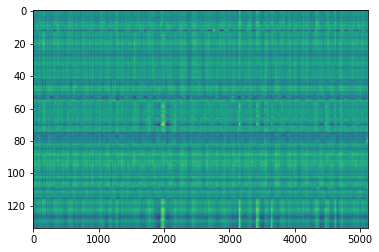

In [ ]:
xx = wavelet[12]
plt.imshow(xx, aspect='auto')
plt.show()



### ***Plotting and finding the Band Power***

The band power simply means the contribution of the given frequency band to the overall power of the signal.In order to compute the band power in the delta band. We first need to estimate the power spectral density.The most widely used method is Welch's Periodogram


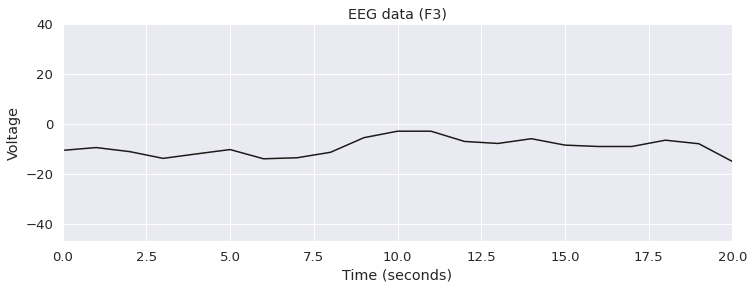

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font_scale=1.2)

# Define sampling frequency and time vector
sf = 256 # Sampling Frequencies
time = 2000 / sf 

# Plot the signal
fig, ax = plt.subplots(1, 1, figsize=(12, 4))
plt.plot(wavelet[12][0],lw=1.5, color='k')
plt.xlabel('Time (seconds)')
plt.ylabel('Voltage')
plt.xlim(0,20)
plt.title('EEG data (F3)')
sns.despine()




> The EEG data is always time varying.The spectral content changes over time.But for a true spectral content of the signal needs to be stationery  i.e Time un-Varying.By averaging the peridograms obtained over short segments of window. Welch's method helps to drastically reduce this varianc. However it reduces the frequency resolution.


$F_{res} = F_{s}dfrac{N}$






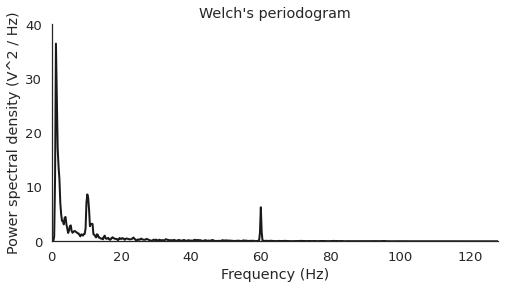

In [ ]:
from scipy import signal

# Define window length (4 seconds)
win = 4 * 256
freqs, psd = signal.welch(X_train[1][0], sf, nperseg=win)

# Plot the power spectrum
sns.set(font_scale=1.2, style='white')
plt.figure(figsize=(8, 4))
plt.plot(freqs, psd, color='k', lw=2)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power spectral density (V^2 / Hz)')
plt.ylim([0, psd.max() * 1.1])
plt.title("Welch's periodogram")
plt.xlim([0, freqs.max()])
sns.despine()

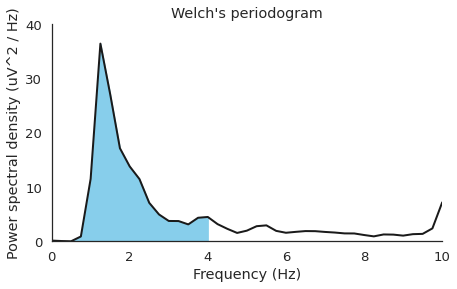

In [ ]:
# Define delta lower and upper limits
low, high = 0.5, 4

# Find intersecting values in frequency vector
idx_delta = np.logical_and(freqs >= low, freqs <= high)

# Plot the power spectral density and fill the delta area
plt.figure(figsize=(7, 4))
plt.plot(freqs, psd, lw=2, color='k')
plt.fill_between(freqs, psd, where=idx_delta, color='skyblue')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power spectral density (uV^2 / Hz)')
plt.xlim([0, 10])
plt.ylim([0, psd.max() * 1.1])
plt.title("Welch's periodogram")
sns.despine()

In [ ]:
from scipy.integrate import simps

# Frequency resolution
freq_res = freqs[1] - freqs[0]  # = 1 / 4 = 0.25

# Compute the absolute power by approximating the area under the curve
delta_power = simps(psd[idx_delta], dx=freq_res)
print('Absolute delta power:',delta_power,'V^2')

Absolute delta power: 37.79549 V^2


In [ ]:
idx_delta = np.logical_and(freqs >= low, freqs <= high)

freqs, psd = signal.welch(X_train[1][0], sf, nperseg=win)

In [ ]:
total_power = simps(psd, dx=freq_res)
delta_rel_power = delta_power / total_power
print('Relative delta power: %.3f' % delta_rel_power)

Relative delta power: 0.497


##MFCC 














In [ ]:
import numpy, scipy, matplotlib.pyplot as plt, sklearn, librosa, urllib, IPython.display
import essentia, essentia.standard as ess
import librosa.display
plt.rcParams['figure.figsize'] = (14,4)

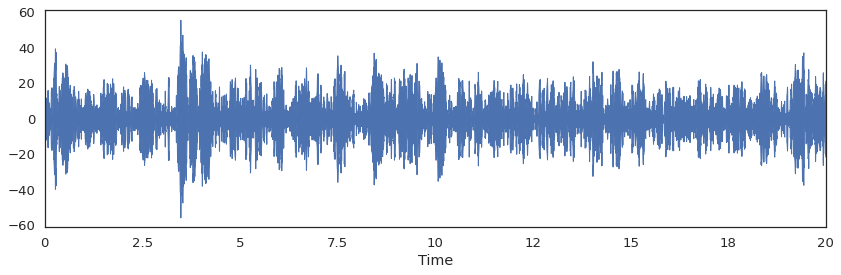

In [ ]:
librosa.display.waveplot(x[0], sr= 256)

In [ ]:
mfccs = librosa.feature.mfcc(x[0], sr=256)
print(mfccs.shape)

(20, 11)


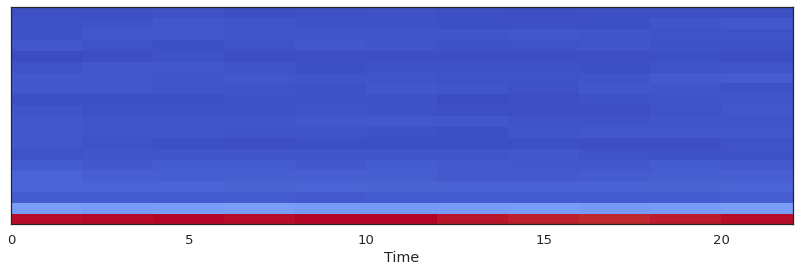

In [ ]:
librosa.display.specshow(mfccs, sr=256, x_axis='time')

In [ ]:
mfccs = sklearn.preprocessing.scale(mfccs*58, axis=1)
print(mfccs.mean(axis=1))
print(mfccs.var(axis=1))

[ 0.  0.  0.  0.  0. -0.  0.  0.  0. -0.  0. -0.  0. -0.  0. -0.  0. -0.
  0.  0.]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


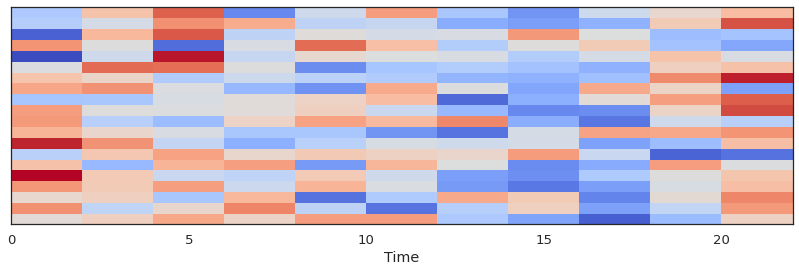

In [ ]:
librosa.display.specshow(mfccs, sr=256, x_axis='time')

In [ ]:
mfccs

array([[ 0.16440722,  0.44892628,  1.03959046,  0.34413296,  1.1771788 ,
         1.16783754, -0.65147145, -1.21802277, -1.99780068, -0.87408215,
         0.3993038 ],
       [ 1.30985314, -0.38273056,  0.2862584 ,  1.443593  , -0.41400054,
        -1.77891687, -0.51546588,  0.43858754, -1.25946733, -0.34205516,
         1.21434426],
       [ 0.26139499,  0.43452315, -0.69995913,  0.83561159, -1.79586663,
        -0.60576176,  1.03512514,  0.53045219, -1.60540852,  0.19810134,
         1.41178763],
       [ 1.24639914,  0.52692614,  1.15502952, -0.20976236,  0.89277121,
         0.00955331, -1.33747925, -1.7352773 , -1.27707837, -0.02088826,
         0.74980622],
       [ 2.35412147,  0.54068549, -0.24545271, -0.40033101,  0.54889312,
        -0.16399033, -1.29217989, -1.47199503, -0.60387767,  0.09646626,
         0.63766029],
       [ 0.69349698, -0.91361358,  0.89148612,  1.15772715, -1.34352452,
         0.87153821,  0.0683383 , -1.52339305, -1.13252203,  1.17184306,
         0.058

## Classfying the Data based on topographical map PIL-image generated, using 2D Convlution Neural Netowork and Long-Short Term Memory Network





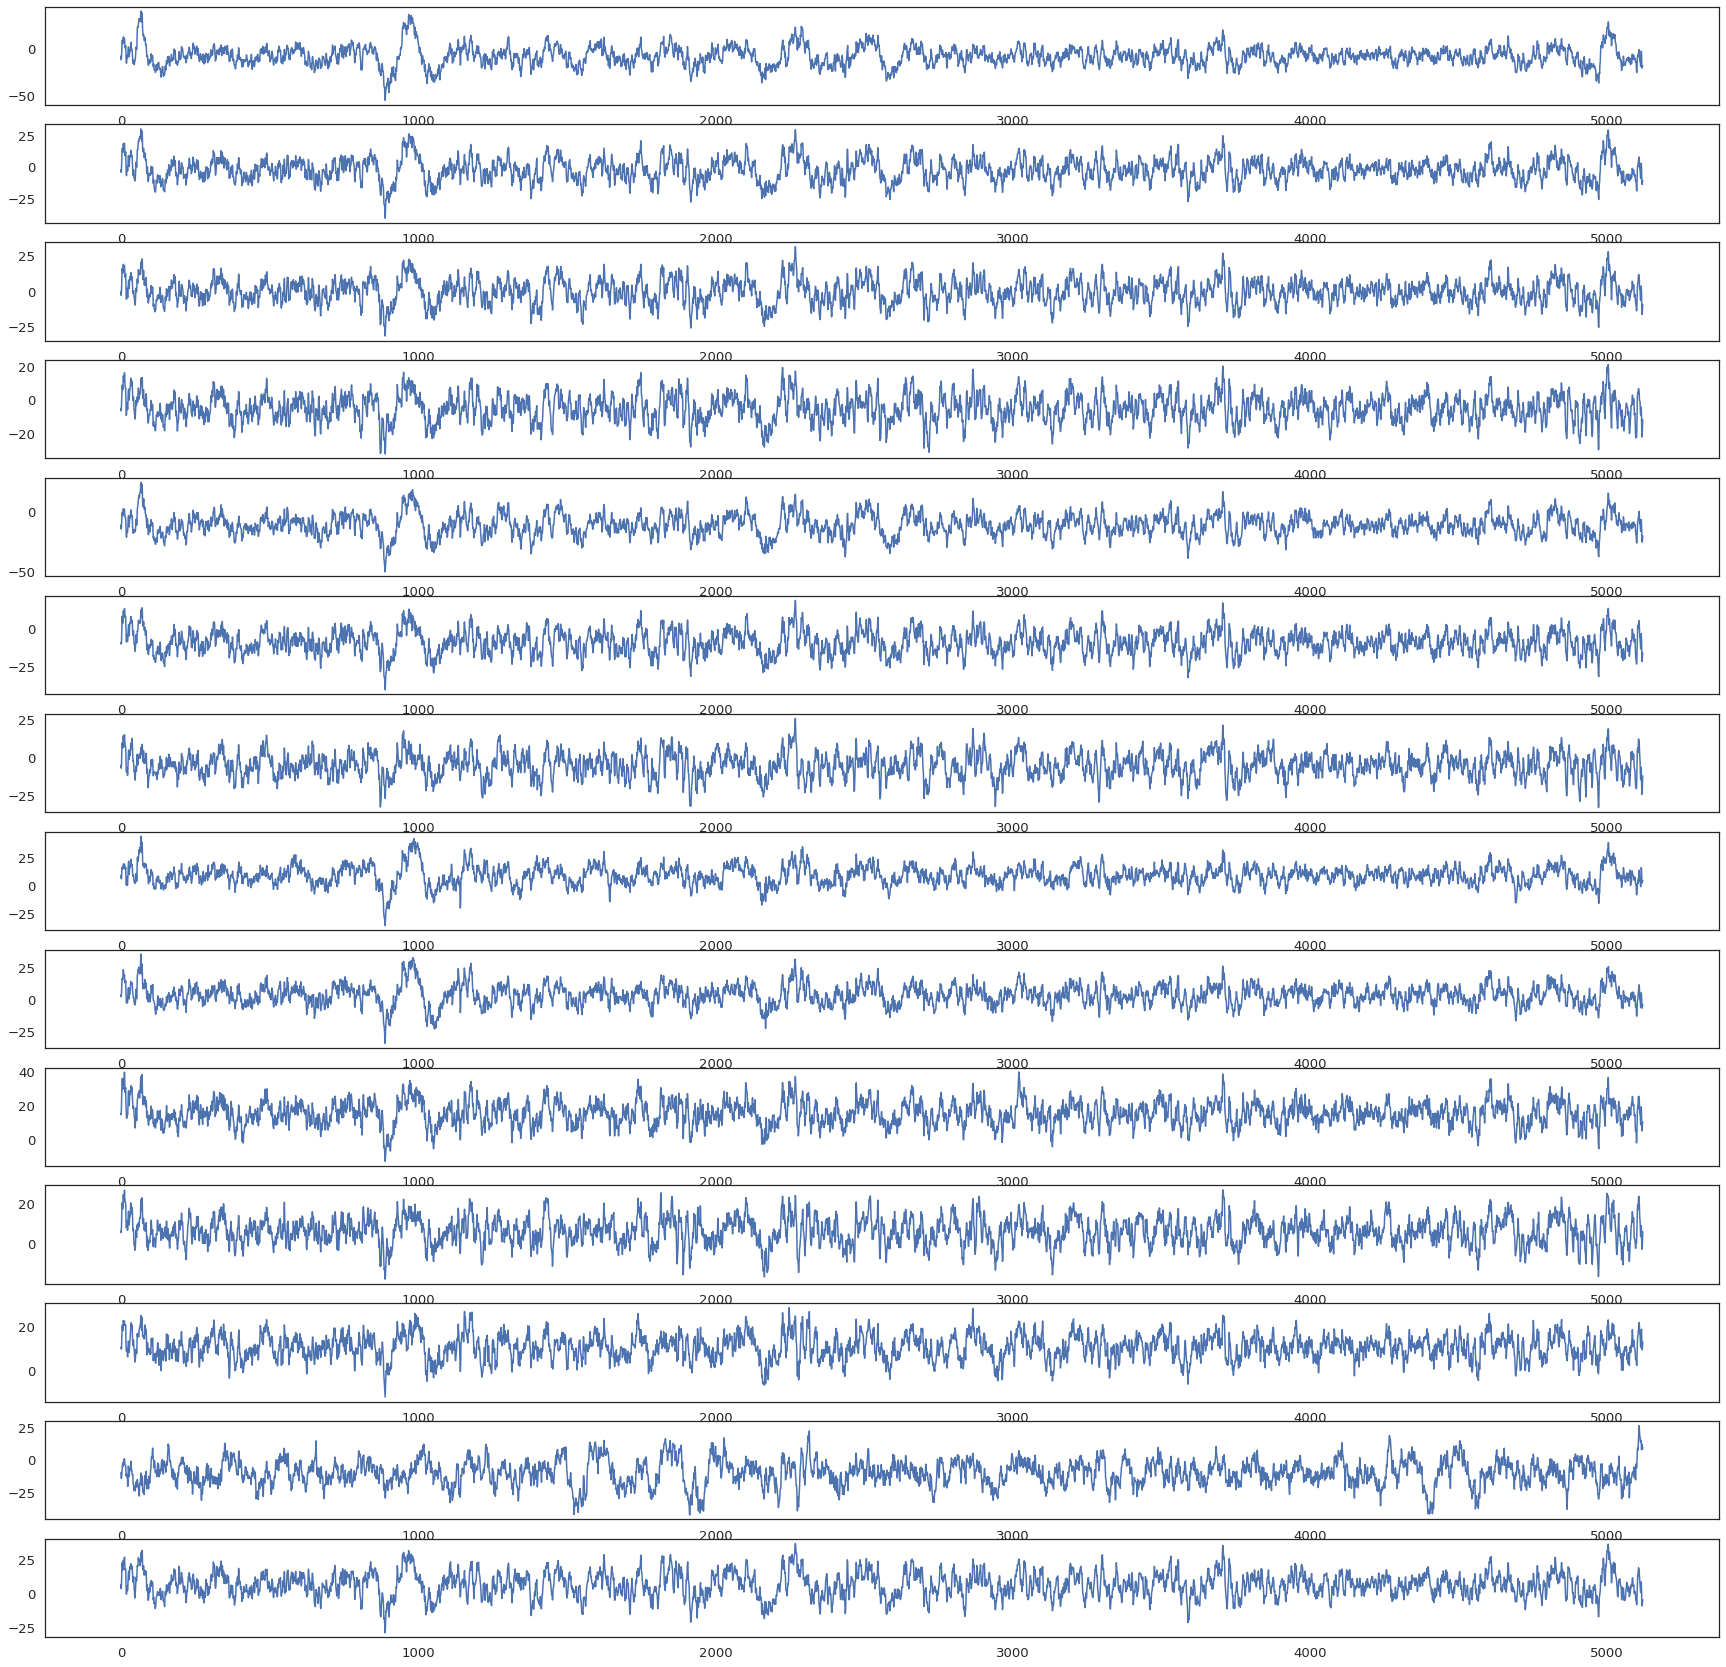

In [ ]:
fig, axs = plt.subplots(14, 1, figsize=(30,30))
for i, ax in enumerate(fig.axes):
    ax.plot(x[i])
    #ax.set_xticks([])
    #ax.set_yticks([])
plt.show()

In [ ]:
df_x = pd.DataFrame(x)

In [ ]:
def plot_fft(snippet):
    Fs = 128.0;  # sampling rate
    #Ts = len(snippet)/Fs/Fs; # sampling interval
    snippet_time = len(snippet)/Fs
    Ts = 1.0/Fs; # sampling interval
    t = np.arange(0,snippet_time,Ts) # time vector

    # ff = 5;   # frequency of the signal
    # y = np.sin(2*np.pi*ff*t)
    y = snippet
#     print('Ts: ',Ts)
#     print(t)
#     print(y.shape)
    n = len(y) # length of the signal
    k = np.arange(n)
    T = n//Fs
    frq = k//T # two sides frequency range
    frq = frq[range(n//2)] # one side frequency range

    Y = np.fft.fft(y)/n # fft computing and normalization
    Y = Y[range(n//2)]
    print(Y.shape)
    #Added in: (To remove bias.)
    Y[0] = 0

    fig, ax = plt.subplots(2, 1)
    ax[0].plot(t,y)
    ax[0].set_xlabel('Time')
    ax[0].set_ylabel('Amplitude')
    ax[1].set_ylim(0, 6)
    ax[1].plot(frq,abs(Y),'r') # plotting the spectrum
    ax[1].set_xlabel('Freq (Hz)')
    ax[1].set_ylabel('|Y(freq)|');


#plot_url = plt.plot_mpl(fig, filename='mpl-basic-fft')

(2560,)


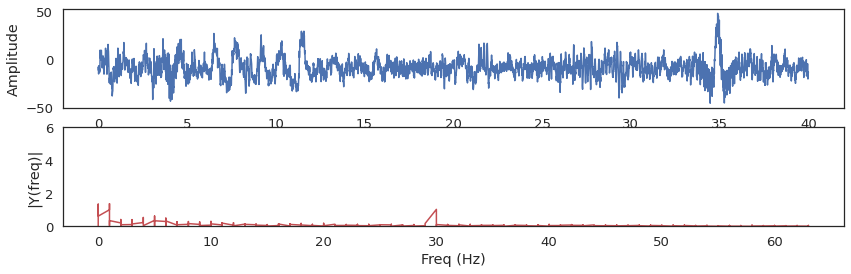

In [ ]:
snippet = waves[84][0]
plot_fft(snippet)

In [ ]:
snippet = x[0]
snippet = snippet - np.mean(snippet)
np.hanning(len(snippet))
plot_fft(np.hanning(len(snippet))*snippet)

(2560,)


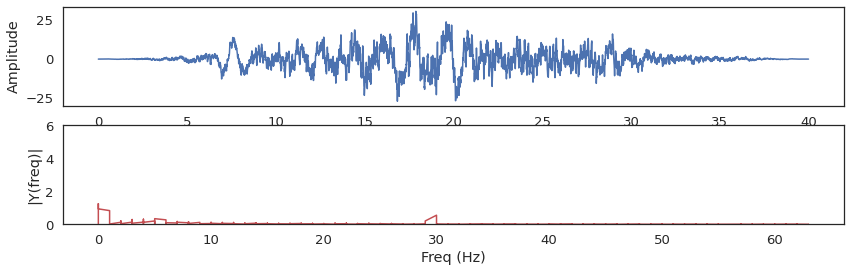

In [ ]:
snippet = x[0]
snippet = snippet - np.mean(snippet)
np.hanning(len(snippet))
plot_fft(np.hanning(len(snippet))*snippet)

In [ ]:
theta = (4,8)
alpha = (8,12)
beta = (12,40)

In [ ]:
def get_fft(snippet):
    Fs = 256.0;  # sampling rate
    #Ts = len(snippet)/Fs/Fs; # sampling interval
    snippet_time = len(snippet)/Fs
    Ts = 1.0/Fs; # sampling interval
    t = np.arange(0,snippet_time,Ts) # time vector

    # ff = 5;   # frequency of the signal
    # y = np.sin(2*np.pi*ff*t)
    y = snippet
#     print('Ts: ',Ts)
#     print(t)
#     print(y.shape)
    n = len(y) # length of the signal
    k = np.arange(n)
    T = n/Fs
    frq = k/T # two sides frequency range
    frq = frq[range(n//2)] # one side frequency range
    Y = cp.fft.fft(y)/n # fft computing and normalization
    Y = cp.asnumpy(Y)
    Y = Y[range(n//2)]
    #Added in: (To remove bias.)
    #Y[0] = 0
    return frq,abs(Y)


In [ ]:
f.shape

(2560,)

In [ ]:
f,Y = get_fft(np.hanning(len(was[0][0]))*was[0][0])

In [ ]:
Y[(f>theta[0]) & (f<=theta[1])].mean()

0.11585280247194721

In [ ]:
f[(f>theta[0]) & (f<=theta[1])]

array([4.04920914, 4.09919938, 4.14918961, 4.19917985, 4.24917008,
       4.29916032, 4.34915056, 4.39914079, 4.44913103, 4.49912127,
       4.5491115 , 4.59910174, 4.64909197, 4.69908221, 4.74907245,
       4.79906268, 4.84905292, 4.89904316, 4.94903339, 4.99902363,
       5.04901386, 5.0990041 , 5.14899434, 5.19898457, 5.24897481,
       5.29896505, 5.34895528, 5.39894552, 5.44893575, 5.49892599,
       5.54891623, 5.59890646, 5.6488967 , 5.69888694, 5.74887717,
       5.79886741, 5.84885764, 5.89884788, 5.94883812, 5.99882835,
       6.04881859, 6.09880883, 6.14879906, 6.1987893 , 6.24877954,
       6.29876977, 6.34876001, 6.39875024, 6.44874048, 6.49873072,
       6.54872095, 6.59871119, 6.64870143, 6.69869166, 6.7486819 ,
       6.79867213, 6.84866237, 6.89865261, 6.94864284, 6.99863308,
       7.04862332, 7.09861355, 7.14860379, 7.19859402, 7.24858426,
       7.2985745 , 7.34856473, 7.39855497, 7.44854521, 7.49853544,
       7.54852568, 7.59851591, 7.64850615, 7.69849639, 7.74848

In [ ]:
def theta_alpha_beta_averages(f,Y):
    theta_range = (4,8)
    alpha_range = (8,12)
    beta_range = (12,40)
    theta = Y[(f>theta_range[0]) & (f<=theta_range[1])].mean()
    alpha = Y[(f>alpha_range[0]) & (f<=alpha_range[1])].mean()
    beta = Y[(f>beta_range[0]) & (f<=beta_range[1])].mean()
    return theta, alpha, beta

In [ ]:
theta, alpha, beta = theta_alpha_beta_averages(f,Y)

In [ ]:
theta, alpha, beta

(0.32055408337122415, 0.15906364000347642, 0.08758919775613264)

In [ ]:
snippet = x[0]
f,Y = get_fft(np.hanning(len(snippet))*snippet)
theta, alpha, beta = theta_alpha_beta_averages(f,Y)
theta, alpha, beta

(0.11585280247194721, 0.13543603990858072, 0.04736562818101985)

In [ ]:
def make_frames(df,frame_duration):
    '''
    in: dataframe or array with all channels, frame duration in seconds
    out: array of theta, alpha, beta averages for each probe for each time step
        shape: (n-frames,m-probes,k-brainwave bands)
    '''
    Fs = 256.0
    frame_length = Fs*frame_duration
    frames = []
    steps = np.arange(0,len(df),frame_length)
    for i,_ in enumerate(steps):
        frame = []
        if i == 0:
            continue
        else:
            for i in range(len(df)):
                snippet = df[i]
                f,Y =  get_fft(snippet)
                theta, alpha, beta = theta_alpha_beta_averages(f,Y)
                frame.append([theta, alpha, beta])
            
        frames.append(frame)
    return np.array(frames)


In [ ]:
X_A = np.array(X)
print(X_A[0].shape)

IndexError: ignored

In [ ]:
X = []
for i in range(0,94):
  X.append(make_frames(was[i],0.05)) 
  print(i)

NameError: ignored

In [ ]:
from tqdm import tqdm

In [ ]:
def gen_ima(i):
  X = []
  labels = []
  was,las = ret_wavelts(i)
  for j in tqdm(range(0,len(was))):
    X.append(make_frames(was[j],0.05)) 
  X_A = np.array(X)
  s_s = "/sub-{0}/eeg/sub-{1}_task-ImaginedEmotion_electrodes.tsv".format(i,i)
  locs_coor = pd.read_csv(os.getcwd()+s_s,sep = '\t')
  X_1 = []
  for i in tqdm(range(0,len(was))):
    X_1.append(X[i].reshape(X_A[i].shape[0],(X_A[i].shape[1]*X_A[i].shape[2])))
  images = []
  x_coor = locs_coor['x'].tolist()
  y_coor = locs_coor['y'].tolist()
  locs_2d = list(zip(x_coor,y_coor))
  for i in tqdm(range(len(was))):
    images.append(gen_images(np.array(locs_2d),X_1[i], 32, normalize=False))
    labels.append([las[i]] * len(images[-1]))
  return [images,labels]

In [ ]:
from google.colab import output
i = 3
ss = ss_n.tolist()

output.clear()
for i in range(24,36):
  ss.append(gen_ima(i))
  s_2 = np.array(ss)
  np.save('ss_ar_{0}.npy'.format(i),s_2)
  output.clear()
  print("Completed till Now",i)

Completed till Now 35


In [ ]:
ss_n = np.load('ss_ar_35.npy',allow_pickle = True)

In [ ]:
ss_s_c = np.empty_like(ss_n[25][0][0])

In [ ]:
ss_s_c.shape

(17, 3, 32, 32)

In [ ]:
ssss = (ss_n[25][0][0],ss_n[25][0][1])

In [ ]:
images = np.concatenate(ss_n[0][0])
for i in range(1,34):
  s_5 = np.concatenate(ss_n[i][0])
  images = np.concatenate((images,s_5))
images.shape

   

(50135, 3, 32, 32)

In [ ]:
labels = np.concatenate(ss_n[0][1])
for i in range(1,34):
  s_5 = np.concatenate(ss_n[i][1])
  labels = np.concatenate((labels,s_5))
labels.shape

(50135,)

In [ ]:
import random
data = list(zip(images,labels))
random.shuffle(data)

In [ ]:
ss_n[25][0][1].shape

(17, 3, 32, 32)

In [ ]:
data

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


6


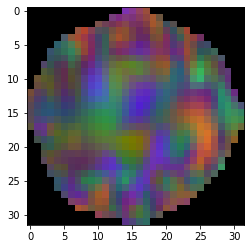

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(data[1224][0].T)
print(data[1224][1])


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


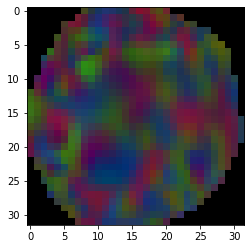

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(ss_i[2][3].T)


In [ ]:
images = []
labels = []
for i in range(0,len(data)):
  images.append(data[i][0])
  labels.append(data[i][1])
images = np.array(images)
labels = np.array(labels)

In [ ]:
images.shape

(50135, 3, 32, 32)

In [ ]:
np.concatenate((img[0], img[1])).shape

(40, 3, 32, 32)

In [ ]:
labels.shape

(50135,)

In [ ]:
from sys import getsizeof
print(getsizeof(lab))

14992


In [ ]:
X_1 = []
for i in range(0,200):
  X_1.append(X[i].reshape(34,224*3))
X_1_A = np.array(X_1)
print(X_1_A.shape)


(200, 34, 672)


In [ ]:
len(X_1
    )

200

In [ ]:
print(get_fft(wavelet[0][0]))

(array([  0.        ,   0.04999024,   0.09998047, ..., 127.82503417,
       127.87502441, 127.92501465]), array([8.34966426, 0.10716826, 0.10977336, ..., 0.00996454, 0.0110426 ,
       0.00282836]))


In [ ]:
print(get_fft(wavelet[0][1]))

(array([  0.        ,   0.04999024,   0.09998047, ..., 127.82503417,
       127.87502441, 127.92501465]), array([2.44100845, 0.09594707, 0.09315487, ..., 0.00767244, 0.01626582,
       0.00615333]))


In [ ]:
Fs = 128.0
frame_length = Fs
np.arange(frame_length-1,len(X_1),frame_length)

array([], dtype=float64)

[]

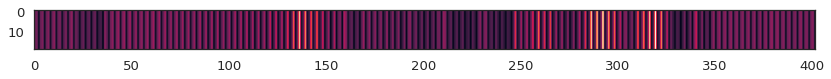

In [ ]:
plt.imshow(X_1[1])
plt.plot()

In [ ]:
from __future__ import print_function
import time

from jax import random
from functools import reduce
import math as m

import scipy.io
#import theano
#import theano.tensor as T

from scipy.interpolate import griddata
from sklearn.preprocessing import scale
#from utils import augment_EEG, cart2sph, pol2cart

#import lasagne
# from lasagne.layers.dnn import Conv2DDNNLayer as ConvLayer
#from lasagne.layers import Conv2DLayer, MaxPool2DLayer, InputLayer
#from lasagne.layers import DenseLayer, ElemwiseMergeLayer, FlattenLayer
#from lasagne.layers import ConcatLayer, ReshapeLayer, get_output_shape
#from lasagne.layers import Conv1DLayer, DimshuffleLayer, LSTMLayer, SliceLayer


def azim_proj(pos):
    """
    Computes the Azimuthal Equidistant Projection of input point in 3D Cartesian Coordinates.
    Imagine a plane being placed against (tangent to) a globe. If
    a light source inside the globe projects the graticule onto
    the plane the result would be a planar, or azimuthal, map
    projection.

    :param pos: position in 3D Cartesian coordinates
    :return: projected coordinates using Azimuthal Equidistant Projection
    """
    [r, elev, az] = cart2sph(pos[0], pos[1], pos[2])
    return pol2cart(az, m.pi / 2 - elev)


def gen_images(locs, features, n_gridpoints, normalize=True,
               augment=False, pca=False, std_mult=0.1, n_components=2, edgeless=False):
    """
    Generates EEG images given electrode locations in 2D space and multiple feature values for each electrode

    :param locs: An array with shape [n_electrodes, 2] containing X, Y
                        coordinates for each electrode.
    :param features: Feature matrix as [n_samples, n_features]
                                Features are as columns.
                                Features corresponding to each frequency band are concatenated.
                                (alpha1, alpha2, ..., beta1, beta2,...)
    :param n_gridpoints: Number of pixels in the output images
    :param normalize:   Flag for whether to normalize each band over all samples
    :param augment:     Flag for generating augmented images
    :param pca:         Flag for PCA based data augmentation
    :param std_mult     Multiplier for std of added noise
    :param n_components: Number of components in PCA to retain for augmentation
    :param edgeless:    If True generates edgeless images by adding artificial channels
                        at four corners of the image with value = 0 (default=False).
    :return:            Tensor of size [samples, colors, W, H] containing generated
                        images.
    """
    feat_array_temp = []
    nElectrodes = locs.shape[0]     # Number of electrodes
    # Test whether the feature vector length is divisible by number of electrodes
    assert features.shape[1] % nElectrodes == 0
    n_colors = features.shape[1] / nElectrodes
    for c in range(int(n_colors)):
        feat_array_temp.append(features[:, c * nElectrodes : nElectrodes * (c+1)])
    if augment:
        if pca:
            for c in range(n_colors):
                feat_array_temp[c] = augment_EEG(feat_array_temp[c], std_mult, pca=True, n_components=n_components)
        else:
            for c in range(n_colors):
                feat_array_temp[c] = augment_EEG(feat_array_temp[c], std_mult, pca=False, n_components=n_components)
    nSamples = features.shape[0]
    # Interpolate the values
    grid_x, grid_y = np.mgrid[
                     min(locs[:, 0]):max(locs[:, 0]):n_gridpoints*1j,
                     min(locs[:, 1]):max(locs[:, 1]):n_gridpoints*1j
                     ]
    temp_interp = []
    for c in range(int(n_colors)):
        temp_interp.append(np.zeros([nSamples, n_gridpoints, n_gridpoints]))
    # Generate edgeless images
    if edgeless:
        min_x, min_y = np.min(locs, axis=0)
        max_x, max_y = np.max(locs, axis=0)
        locs = np.append(locs, np.array([[min_x, min_y], [min_x, max_y],[max_x, min_y],[max_x, max_y]]),axis=0)
        for c in range(n_colors):
            feat_array_temp[c] = np.append(feat_array_temp[c], np.zeros((nSamples, 4)), axis=1)
    # Interpolating
    for i in range(nSamples):
        for c in range(int(n_colors)):
            temp_interp[c][i, :, :] = griddata(locs, feat_array_temp[c][i, :], (grid_x, grid_y),
                                    method='cubic', fill_value=np.nan)
        print('Interpolating {0}/{1}\r'.format(i+1, nSamples), end='\r')
    # Normalizing
    for c in range(int(n_colors)):
        if normalize:
            temp_interp[c][~np.isnan(temp_interp[c])] = \
                scale(temp_interp[c][~np.isnan(temp_interp[c])])
        temp_interp[c] = np.nan_to_num(temp_interp[c])
    return np.swapaxes(np.asarray(temp_interp), 0, 1)     # swap axes to have [samples, colors, W, H]



In [ ]:
locs_2d = [(0.3365922112395738, -1.2361058792074007), (7.604101253680111e-17, -1.2418439763978288), 
           (-0.34374733394096496, -1.0016415369557565), (0.9157742224076064, -0.8516700268390739), 
           (0.22667265410177617, -0.693305669614743), (4.2303075026511913e-17, -0.6908616436341476), 
           (2.5666550686485195e-17, -0.41916658263191064), (-0.2557240551721939, -0.42833779241342484), 
           (-0.534287745073574, -0.4446918001304672), (-0.7936131740399253, -0.4555545752281128), 
           (0.21398122533036998, 0.38447594357747117), (2.272936032830068e-17, 0.3711986238665017), 
           (-0.48863672925399154, 0.7252902040103363), (1,1)]#(-0.6162746958262504, 0.8132625003849987),]

In [ ]:
s_s = "/sub-3/eeg/sub-3_task-ImaginedEmotion_electrodes.tsv"
locs_coor = pd.read_csv(os.getcwd()+s_s,sep = '\t')

In [ ]:
x_coor = locs_coor['x'].tolist()
y_coor = locs_coor['y'].tolist()
locs_2d = list(zip(x_coor,y_coor))

In [ ]:
len(locs_2d)

134

In [ ]:
images = []
for i in range(200):
  images.append(gen_images(np.array(locs_2d),X_1[i], 32, normalize=False))

In [ ]:
images = np.array(images)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


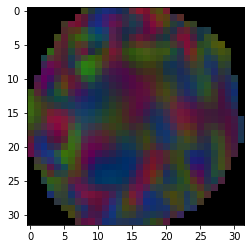

In [ ]:
import matplotlib.pyplot as plt

plt.imshow(images[144][22].T)


In [ ]:
images.shape

(200, 34, 3, 32, 32)

In [ ]:
dicc = {0: 'prebase_instruct',
 1: 'prebase',
 2: 'FeelingItInstructionsButton',
 3: 'InstructionsForEnding',
 4: 'relax',
 5: 'ImaginationSuggestions',
 6: 'awe',
 7: 'awe',
 8: 'press1',
 9: 'press',
 10: 'exit',
 11: 'enter',
 12: 'frustration',
 13: 'press1',
 14: 'press',
 15: 'exit',
 16: 'enter',
 17: 'joy',
 18: 'press1',
 19: 'press',
 20: 'press',
 21: 'exit',
 22: 'enter',
 23: 'anger',
 24: 'press1',
 25: 'press',
 26: 'exit',
 27: 'enter',
 28: 'happy',
 29: 'press1',
 30: 'press',
 31: 'press',
 32: 'press',
 33: 'press',
 34: 'press',
 35: 'exit',
 36: 'enter',
 37: 'sad',
 38: 'press1',
 39: 'press',
 40: 'press',
 41: 'exit',
 42: 'enter',
 43: 'love',
 44: 'press1',
 45: 'press',
 46: 'press',
 47: 'exit',
 48: 'enter',
 49: 'grief',
 50: 'press1',
 51: 'exit',
 52: 'enter',
 53: 'compassion',
 54: 'press1',
 55: 'press',
 56: 'press',
 57: 'exit',
 58: 'enter',
 59: 'fear',
 60: 'press1',
 61: 'exit',
 62: 'enter',
 63: 'content',
 64: 'press1',
 65: 'press',
 66: 'press',
 67: 'press',
 68: 'press',
 69: 'press',
 70: 'press',
 71: 'exit',
 72: 'enter',
 73: 'jealousy',
 74: 'press1',
 75: 'press',
 76: 'exit',
 77: 'enter',
 78: 'relief',
 79: 'press1',
 80: 'press',
 81: 'press',
 82: 'exit',
 83: 'enter',
 84: 'disgust',
 85: 'press1',
 86: 'exit',
 87: 'enter',
 88: 'excite',
 89: 'press1',
 90: 'exit',
 91: 'postbase_instruct',
 92: 'postbase',
 93: 'ExitThankYou'}

In [ ]:
event_id_set = set(dicc.values())
val = [x for x in range(1,len(event_id_set)+1)]
event_id_set_dict = dict(zip(event_id_set,val))
event_id_dict = dict(zip(event_id_set,val))

In [ ]:
event_id_dict

{'ExitThankYou': 3,
 'FeelingItInstructionsButton': 1,
 'ImaginationSuggestions': 19,
 'InstructionsForEnding': 4,
 'anger': 13,
 'awe': 20,
 'compassion': 12,
 'content': 27,
 'disgust': 28,
 'enter': 2,
 'excite': 15,
 'exit': 6,
 'fear': 22,
 'frustration': 23,
 'grief': 14,
 'happy': 7,
 'jealousy': 17,
 'joy': 16,
 'love': 18,
 'postbase': 9,
 'postbase_instruct': 21,
 'prebase': 11,
 'prebase_instruct': 26,
 'press': 8,
 'press1': 10,
 'relax': 24,
 'relief': 25,
 'sad': 5}

In [ ]:
labs = []
for i in range(0,len(labels)):
  n = int(labels[0])
  labs.append(np.array([1 if x is n else 0 for x in range(0,28)]))


In [ ]:
labs = np.array(labs)

In [ ]:
labs.shape

(50135, 28)

In [ ]:
import pandas as pd
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
X_train, X_test, y_train, y_test = train_test_split(images, labs, test_size=0.2)

In [ ]:
X_train.shape

(40108, 3, 32, 32)

In [ ]:
X_test.shape

(10027, 3, 32, 32)

In [ ]:
y_train.shape

(40108, 30)

In [ ]:
y_test.shape

(10027, 30)

In [ ]:
X_train[0].shape

(3, 32, 32)

In [ ]:
y_test[0]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
X_train = X_train.reshape(40108,32,32,3)
X_test = X_test.reshape(10027,32,32,3)

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, Lambda, MaxPooling2D # convolution layers
from keras.layers import Dense, Dropout, Flatten # core layers
from keras.layers.normalization import BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from keras.constraints import max_norm
model=Sequential()

 
model.add(Conv2D(filters=64, kernel_size = (3,3),kernel_constraint=max_norm(3), bias_constraint=max_norm(3), activation="selu", input_shape=(32,32,3)))
model.add(Conv2D(filters=64, kernel_size = (3,3),kernel_constraint=max_norm(3), bias_constraint=max_norm(3), activation="selu"))

model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Conv2D(filters=128, kernel_size = (3,3),kernel_constraint=max_norm(3), bias_constraint=max_norm(3), activation="selu"))
model.add(Conv2D(filters=128, kernel_size = (3,3),kernel_constraint=max_norm(3), bias_constraint=max_norm(3), activation="selu"))

model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())    
model.add(Conv2D(filters=256, kernel_size = (3,3),kernel_constraint=max_norm(3), bias_constraint=max_norm(3), activation="selu"))
    
model.add(MaxPooling2D(pool_size=(2,2)))
    
model.add(Flatten())
model.add(BatchNormalization())
model.add(Dense(512,activation="selu"))
    
model.add(Dense(28,activation="softmax"))
    
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [ ]:
model.summary()

Model: "sequential_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_69 (Conv2D)           (None, 30, 30, 64)        1792      
_________________________________________________________________
conv2d_70 (Conv2D)           (None, 28, 28, 64)        36928     
_________________________________________________________________
max_pooling2d_36 (MaxPooling (None, 14, 14, 64)        0         
_________________________________________________________________
batch_normalization_30 (Batc (None, 14, 14, 64)        256       
_________________________________________________________________
conv2d_71 (Conv2D)           (None, 12, 12, 128)       73856     
_________________________________________________________________
conv2d_72 (Conv2D)           (None, 10, 10, 128)       147584    
_________________________________________________________________
max_pooling2d_37 (MaxPooling (None, 5, 5, 128)       

In [ ]:
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=3)

Epoch 1/3
1254/1254 [==============================] - 401s 320ms/step - loss: 0.0177 - accuracy: 0.9966 - val_loss: 5.1469e-06 - val_accuracy: 1.0000
Epoch 2/3
1254/1254 [==============================] - 401s 320ms/step - loss: 1.5653e-05 - accuracy: 1.0000 - val_loss: 1.6329e-06 - val_accuracy: 1.0000
Epoch 3/3
1254/1254 [==============================] - 402s 320ms/step - loss: 3.5962e-06 - accuracy: 1.0000 - val_loss: 3.5044e-07 - val_accuracy: 1.0000


In [ ]:
history = model.fit_generator(train_gen, 
                              epochs = epochs, 
                              steps_per_epoch = X_train.shape[0] // batch_size,
                              validation_data = test_gen,
                              validation_steps = X_test.shape[0] // batch_size)

Epoch 1/3
 19/626 [..............................] - ETA: 5:50 - loss: 2.2092e-05 - accuracy: 1.0000

KeyboardInterrupt: ignored

In [ ]:

datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images


#datagen.fit(X_train)
train_gen = datagen.flow(X_train, y_train, batch_size=batch_size)
test_gen = datagen.flow(X_test, y_test, batch_size=batch_size)

In [ ]:
epochs = 3
batch_size = 64

In [ ]:
# input image dimensions
img_rows, img_cols = 32, 32

X_train = X_train.astype('float32')
X_train.
X_test = X_test.astype('float32')
#x_train /= 255
#x_test /= 255
print('x_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

input_shape = (img_rows, img_cols, 3)

x_train shape: (40108, 3, 32, 32)
40108 train samples
10027 test samples
